# Relevés des données de l'IMU des Pogobots


### Utilisation de matplotlib pour les graphes

Parce que Google Sheets est relou


________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________


# Définition des fonctions


In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

NULLIFY_GRAVITY = True      # if True, aligns gravity on 0 (adds 9.81)
GRAVITY = 9.81              # the amount to add if NULLIFY_GRAVITY is True
FIGSIZE = (20, 6)           # size of the plots
Y_MAX =  30.0               # vertical maximum of the plot
Y_MIN = -Y_MAX              # vertical minimum of the plot

In [82]:

def align_val(val : float):
    # just to align float in displayed string
    return ("%.3f" % round(val,3)).rjust(10)



def _print_data_line(data, data_short_name, data_suffix):
    name = data_short_name + data_suffix
    mx = max(data)
    mn = min(data)
    range = mx-mn
    print(f"{name.rjust(15)}  | {align_val(np.mean(data))} | {align_val(np.median(data))} | {align_val(mx)} | {align_val(mn)} | {align_val(range)} | {align_val(np.std(data))} | {align_val(np.var(data))} |")

def _print_data_title():
    print("Valeurs sur les relevés :")
    print( "          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |")

def print_data(dataX, dataY, dataZ, data_short_name, full_display=True):
    # print interesting stats on the data
    if full_display:
        _print_data_title()
    _print_data_line(dataX, data_short_name, "X")
    _print_data_line(dataY, data_short_name, "Y")
    _print_data_line(dataZ, data_short_name, "Z")

def print_1D_data(data, data_short_name, full_display=True):
    # print interesting stats on the data
    if full_display:
        _print_data_title()
    _print_data_line(data, data_short_name, "")


def plot_data(data_time, dataX, dataY, dataZ, data_short_name="data", style='-', c="free"):
    clr = c
    if clr=="free":
        clr = "red"
    plt.plot(data_time, dataX,  label=f"{data_short_name}X",  linewidth=1, linestyle=style, color=clr)
    clr = c
    if clr=="free":
        clr = "green"
    plt.plot(data_time, dataY,  label=f"{data_short_name}Y",  linewidth=1, linestyle=style, color=clr)
    clr = c
    if clr=="free":
        clr = "blue"
    plt.plot(data_time, dataZ,  label=f"{data_short_name}Z",  linewidth=1, linestyle=style, color=clr)

def plot_data_array(data_time, data_arr, data_short_name = "data", style='-', c="free"):
    plot_data(data_time, data_arr[0], data_arr[1], data_arr[2], data_short_name, style, c)

def create_graph(data_time, dataX, dataY, dataZ, data_short_name, data_name, data_title):
    plt.figure(figsize=FIGSIZE, dpi=80)
    plot_data(data_time, dataX, dataY, dataZ, data_short_name)
    plt.xlabel("Temps (en millisecondes)")
    plt.ylabel("Valeurs de l'IMU")
    plt.legend(loc="upper left")
    if NULLIFY_GRAVITY:
        plt.ylim([Y_MIN, Y_MAX])
    else:
        plt.ylim([Y_MIN - GRAVITY, Y_MAX])
    plt.title(f"{data_name} de l'IMU {data_title}")
    plt.show()

def compare_arrays(data_time1, data1, data_short_name1, data_time2, data2, data_short_name2, graph_title):
    print_1D_data(data1, data_short_name1)
    print_1D_data(data2, data_short_name2, False)
    plt.figure(figsize=FIGSIZE, dpi=80)
    plt.plot(data_time1, data1,  label=f"{data_short_name1}",  linewidth=1, linestyle='-', color='blue')
    plt.plot(data_time2, data2,  label=f"{data_short_name2}",  linewidth=1, linestyle='-', color='red')
    plt.xlabel("Temps (en millisecondes)")
    plt.ylabel("Valeurs de l'IMU")
    plt.legend(loc="upper left")
    if NULLIFY_GRAVITY:
        plt.ylim([Y_MIN, Y_MAX])
    else:
        plt.ylim([Y_MIN - GRAVITY, Y_MAX])
    plt.title(f"{graph_title}")
    plt.show()

def compare_arrays_3d(data_time1, dataX1, dataY1, dataZ1, data_short_name1, data_time2, dataX2, dataY2, dataZ2, data_short_name2, graph_title):
    print_data(dataX1, dataY1, dataZ1, data_short_name1)
    print_data(dataX2, dataY2, dataZ2, data_short_name2, False)
    plt.figure(figsize=FIGSIZE, dpi=80)
    plot_data(data_time1, dataX1, dataY1, dataZ1, data_short_name1, '-', 'blue', )
    plot_data(data_time2, dataX2, dataY2, dataZ2, data_short_name2, '-', 'red')
    plt.xlabel("Temps (en millisecondes)")
    plt.ylabel("Valeurs de l'IMU")
    plt.legend(loc="upper left")
    if NULLIFY_GRAVITY:
        plt.ylim([Y_MIN, Y_MAX])
    else:
        plt.ylim([Y_MIN - GRAVITY, Y_MAX])
    plt.title(f"{graph_title}")
    plt.show()

def read_data_dict(data_file):
    (data_time, data_motor_power, data_accX, data_accY, data_accZ, data_gyroX, data_gyroY, data_gyroZ) = read_data(data_file)
    res_dict = {}
    res_dict["time"] = data_time
    res_dict["motor_power"] = data_motor_power
    res_dict["accX"] = data_accX
    res_dict["accY"] = data_accY
    res_dict["accZ"] = data_accZ
    res_dict["gyroX"] = data_gyroX
    res_dict["gyroY"] = data_gyroY
    res_dict["gyroZ"] = data_gyroZ
    res_dict["gyroZ"] = data_gyroZ
    return res_dict

def read_data(data_file):
    data_time = []
    data_motor_power = []
    data_accX = []
    data_accY = []
    data_accZ = []
    data_gyroX = []
    data_gyroY = []
    data_gyroZ = []

    for line in open(data_file, "r"):
        if len(line) != 0 and line.startswith(" "):
            time, mPow, accX, accY, accZ, gyroX, gyroY, gyroZ = line.split()
            time = time.replace(",", "")
            mPow = mPow.replace(",", "")
            accX = accX.replace(",", "")
            accY = accY.replace(",", "")
            accZ = accZ.replace(",", "")
            gyroX = gyroX.replace(",", "")
            gyroY = gyroY.replace(",", "")
            gyroZ = gyroZ.replace(",", "")
            data_time.append(float(time))
            data_motor_power.append(int(mPow))
            data_accX.append(float(accX))
            data_accY.append(float(accY))
            if NULLIFY_GRAVITY:
                data_accZ.append(float(accZ) + GRAVITY)
            else:
                data_accZ.append(float(accZ))
            data_gyroX.append(float(gyroX))
            data_gyroY.append(float(gyroY))
            data_gyroZ.append(float(gyroZ))
    return (data_time, data_motor_power, data_accX, data_accY, data_accZ, data_gyroX, data_gyroY, data_gyroZ)

def display_data(data_title, data_file):
    print("\n==================================================================")
    print(f"Relevés de l'IMU {data_title}")
    print("==================================================================\n\n")
    
    data_time, data_motor_power, data_accX, data_accY, data_accZ, data_gyroX, data_gyroY, data_gyroZ = read_data(data_file)

    print_data(data_accX, data_accY, data_accZ, " acc")
    print_data(data_gyroX, data_gyroY, data_gyroZ, "gyro", False)
    create_graph(data_time, data_accX, data_accY, data_accZ, "Accéleration", "acc", data_title)
    create_graph(data_time, data_gyroX, data_gyroY, data_gyroZ, "Gyroscope", "gyro", data_title)
    print("==================================================================")



if NULLIFY_GRAVITY:
    print(f"La gravité est mise à 0 (+{GRAVITY} sur le calcul)\n")




La gravité est mise à 0 (+9.81 sur le calcul)



________________________________________________________________________________________________________________
________________________________________________________________________________________________________________


# Using filters


In [73]:
import filterpy
from pykalman import KalmanFilter
from scipy.signal import savgol_filter

#### Kalman

measurements : 
 [[1 0]
 [0 0]
 [0 1]]


smoothed_state_means : 
 [[-0.67441149  0.39899312]
 [-0.81992226  0.19109279]
 [-1.72967476  0.29641685]]


smoothed_state_covariances :
 [[[ 0.22959645 -0.05069643]
  [-0.05069643  0.09444809]]

 [[ 0.72264751 -0.02814856]
  [-0.02814856  0.25053408]]

 [[ 1.16033437  0.11983719]
  [ 0.11983719  0.41791538]]]


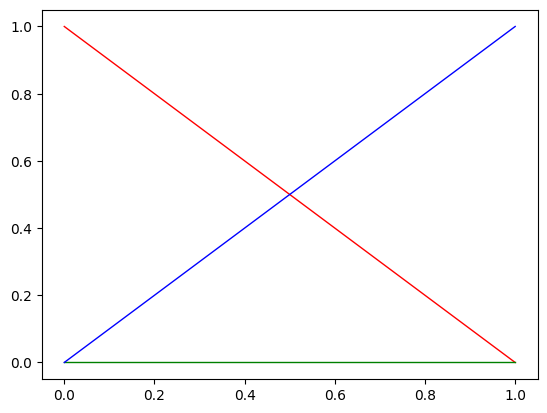

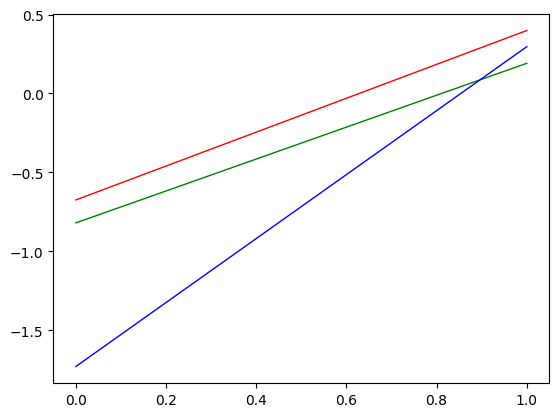

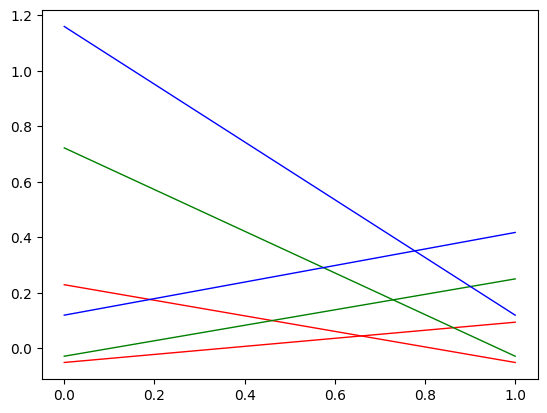

In [93]:
data_dict_still = read_data_dict("imu_immobile_512x512.txt")
data_dict_moving = read_data_dict("imu_deplacement_512x512.txt")
#data_dict_moving = read_data_dict("imu_secousses_main_512x512.txt")
data_dict_moving = read_data_dict("imu_deplacement_main_512x512.txt")
array_still_acc = [
    data_dict_still["accX"],
    data_dict_still["accY"],
    data_dict_still["accZ"]
]
time_still = data_dict_still["time"]
array_moving_acc = [
    data_dict_moving["accX"],
    data_dict_moving["accY"],
    data_dict_moving["accZ"]
]

kf = KalmanFilter(
    transition_matrices = [[1, 1], [0, 1]], 
    observation_matrices = [[0.1, 0.5], [-0.3, 0.0]]
    )
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
#measurements = array_moving_acc
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

print("measurements : \n", measurements)
print("\n\nsmoothed_state_means : \n", smoothed_state_means)
print("\n\nsmoothed_state_covariances :\n", smoothed_state_covariances)

time = [0, 1]
#plot_data_array(time_still, array_still_acc)
#plt.show()
plot_data_array(time, measurements)
plt.show()
plot_data_array(time, smoothed_state_means)
plt.show()
plot_data_array(time, smoothed_state_covariances)
plt.show()


#### Savitzky-Golay filter

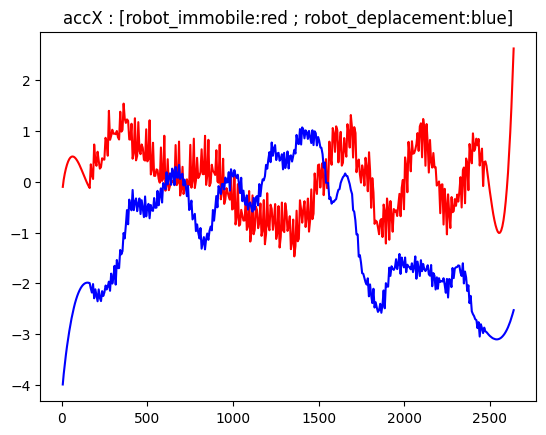

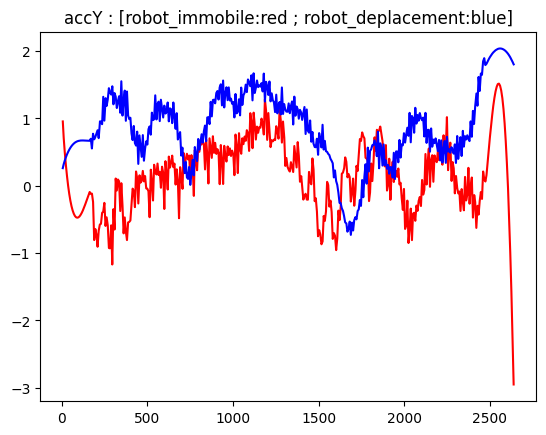

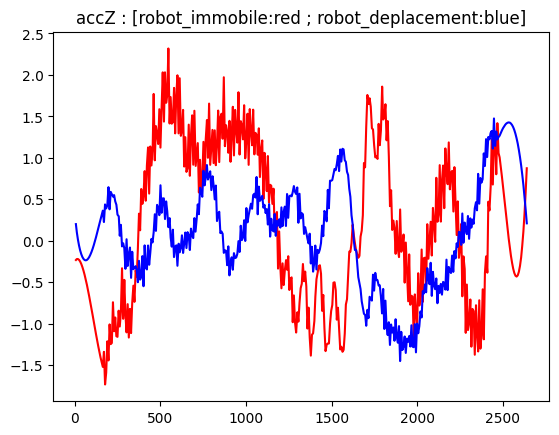

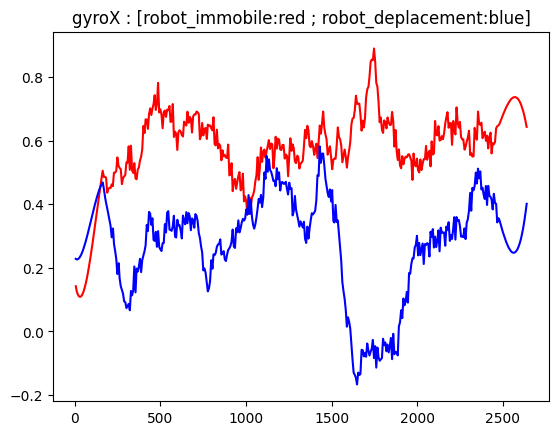

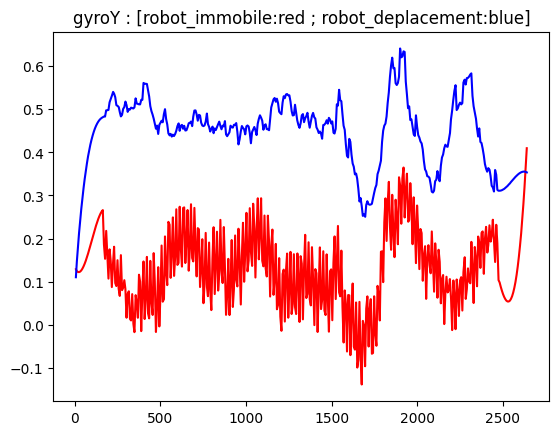

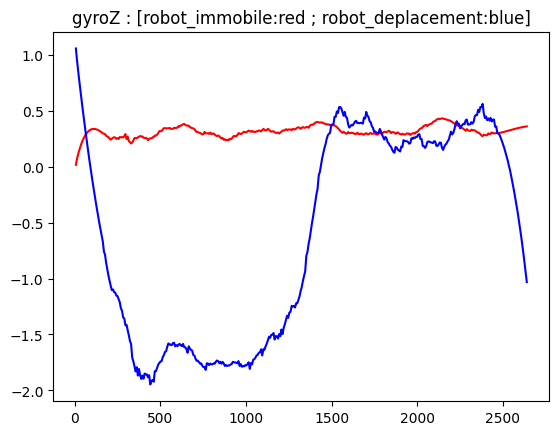

In [62]:
WINDOW_SIZE = 50
POLYNOMIAL_ORDER = 3

data_dict_still = read_data_dict("imu_immobile_512x512.txt")
data_dict_moving = read_data_dict("imu_deplacement_512x512.txt")
#data_dict_moving = read_data_dict("imu_secousses_main_512x512.txt")
data_dict_moving = read_data_dict("imu_deplacement_main_512x512.txt")

def plot_data(dict, data_name):
    # dict = data dictionary
    # data_name = key of the data to display
    x = dict["time"]
    y = dict[data_name]
    yhat = savgol_filter(y, WINDOW_SIZE, POLYNOMIAL_ORDER)
    plt.plot(x,y)
    plt.plot(x,yhat, color='red')
    plt.show()

def compare_plots(dict1, dict1_name, dict2, dict2_name, data_name):
    x1 = dict1["time"]
    y1 = dict1[data_name]
    yhat1 = savgol_filter(y1, WINDOW_SIZE, POLYNOMIAL_ORDER)
    plt.plot(x1,yhat1, color='red')
    x2 = dict2["time"]
    y2 = dict2[data_name]
    yhat2 = savgol_filter(y2, WINDOW_SIZE, POLYNOMIAL_ORDER)
    plt.plot(x2,yhat2, color='blue')
    plt.title(data_name + " : ["+dict1_name+":red ; "+dict2_name+":blue]")
    plt.show()

"""
for dict in [data_dict_still, data_dict_moving]:
    for k in ["accX", "accY", "accZ"]:
        plot_data(dict, k)
"""

for k in ["accX", "accY", "accZ"]:
    compare_plots(data_dict_still, "robot_immobile", data_dict_moving, "robot_deplacement", k)
for k in ["gyroX", "gyroY", "gyroZ"]:
    compare_plots(data_dict_still, "robot_immobile", data_dict_moving, "robot_deplacement", k)



#### Convolution smooth

Immobile 512*512:


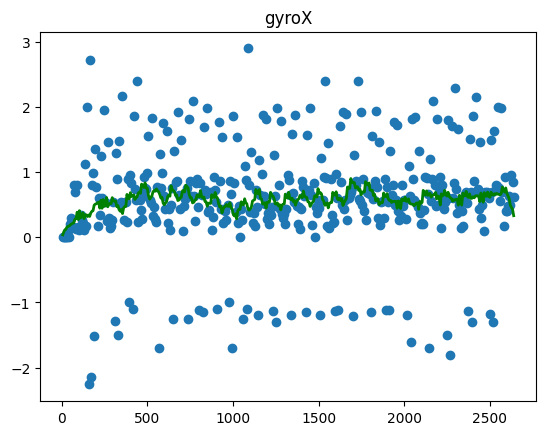

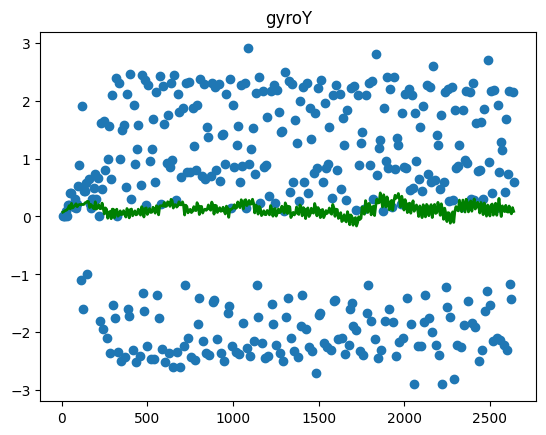

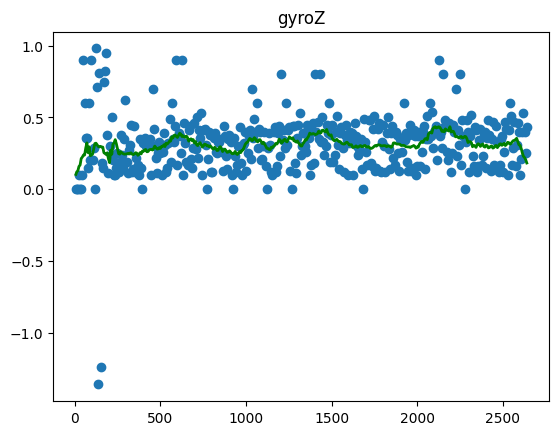




Déplacements main 512*512:


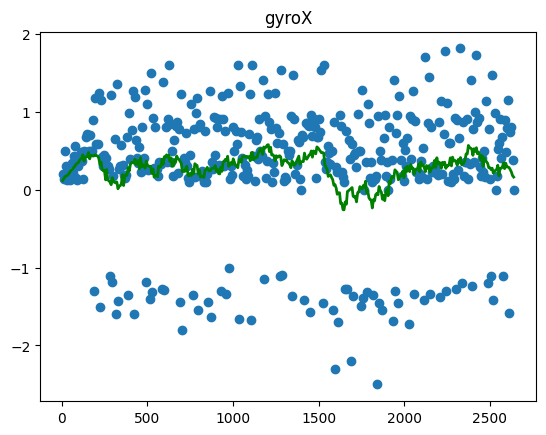

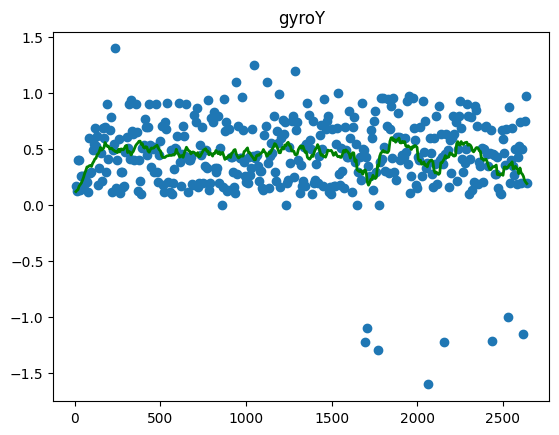

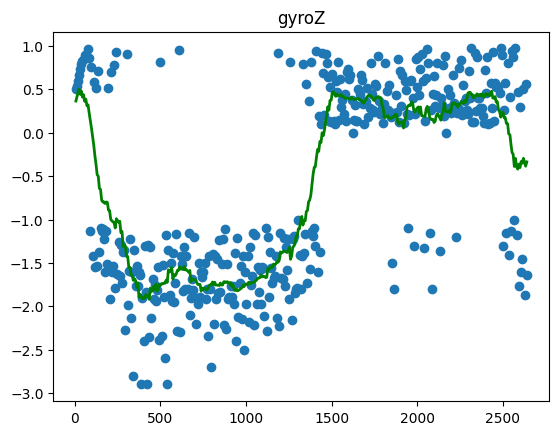

In [59]:
SMOOTHING_POWA = 20

data_dict_still = read_data_dict("imu_immobile_512x512.txt")
data_dict_moving = read_data_dict("imu_deplacement_main_512x512.txt")
#data_dict_moving = read_data_dict("imu_secousses_main_512x512.txt")


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plot_smooth(x, y, title):
    plt.plot(x, y,'o')
    #plt.plot(x, smooth(y,3), 'r-', lw=2)
    plt.plot(x, smooth(y,SMOOTHING_POWA), 'g-', lw=2)
    plt.title(title)
    plt.show()

print("Immobile 512*512:")
for d in ["gyroX", "gyroY", "gyroZ"]:
    plot_smooth(data_dict_still["time"], data_dict_still[d], d)
print("\n\n\nDéplacements main 512*512:")
for d in ["gyroX", "gyroY", "gyroZ"]:
    plot_smooth(data_dict_moving["time"], data_dict_moving[d], d)



#### One more smooth cuz why not


____________________________________________________________________________
____________________________________________________________________________


# Données brutes


Relevés de l'IMU au repos (sans vibrations)


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
           accX  |      0.124 |      0.100 |      0.800 |      0.000 |      0.800 |      0.130 |      0.017 |
           accY  |      0.103 |      0.100 |      0.700 |      0.000 |      0.700 |      0.128 |      0.016 |
           accZ  |      0.005 |      0.000 |      0.070 |     -0.050 |      0.120 |      0.021 |      0.000 |
          gyroX  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
          gyroY  |      0.002 |      0.000 |      0.280 |      0.000 |      0.280 |      0.018 |      0.000 |
          gyroZ  |      0.004 |      0.000 |      0.270 |      0.000 |      0.270 |      0.033 |      0.001 |


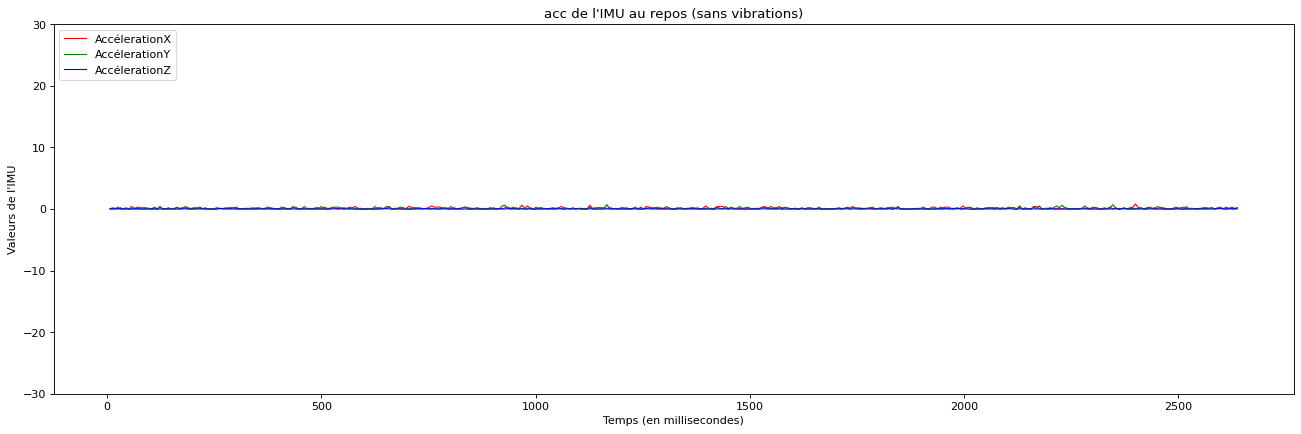

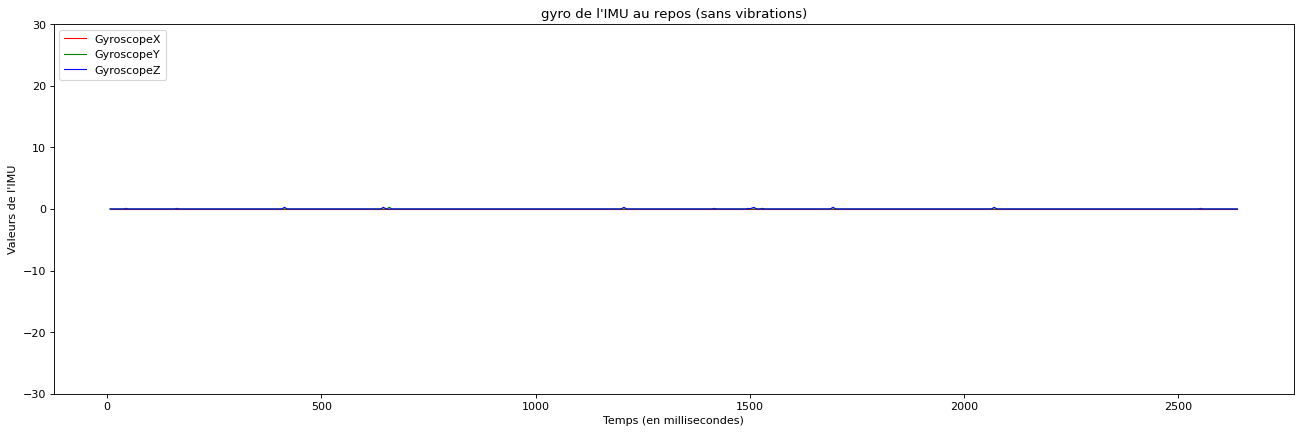

In [4]:
display_data("au repos (sans vibrations)", "imu_repos.txt")


Relevés de l'IMU immobile, moteur 512x0


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
           accX  |      0.147 |      0.780 |      6.670 |     -5.480 |     12.150 |      1.665 |      2.771 |
           accY  |     -0.034 |     -1.415 |     15.290 |     -9.500 |     24.790 |      7.519 |     56.535 |
           accZ  |     -0.182 |      0.330 |     11.520 |    -16.090 |     27.610 |      8.040 |     64.646 |
          gyroX  |      0.274 |      0.560 |      1.800 |     -1.800 |      3.600 |      0.970 |      0.942 |
          gyroY  |      0.363 |      0.350 |      0.900 |      0.000 |      0.900 |      0.179 |      0.032 |
          gyroZ  |      0.446 |      0.470 |      0.900 |      0.000 |      0.900 |      0.186 |      0.034 |


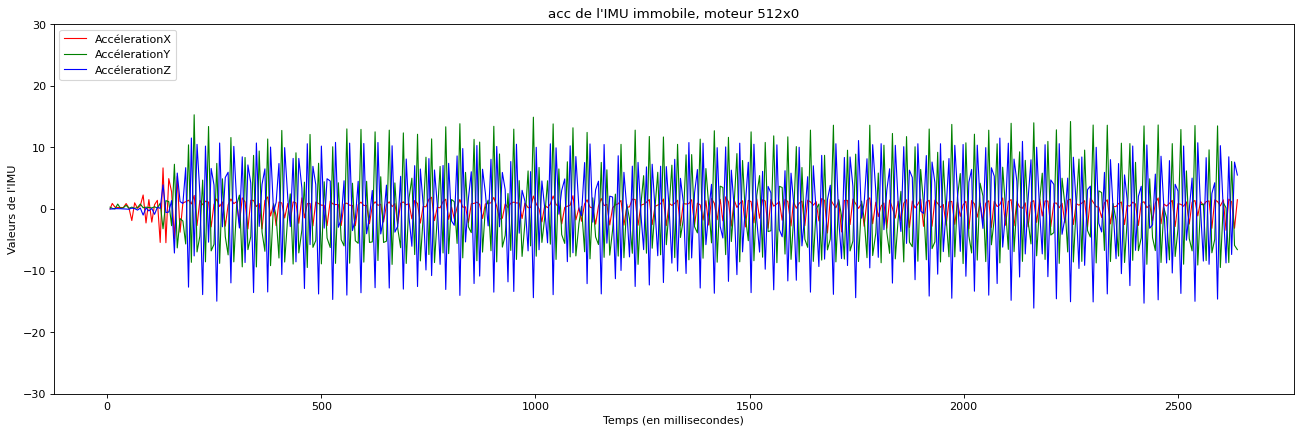

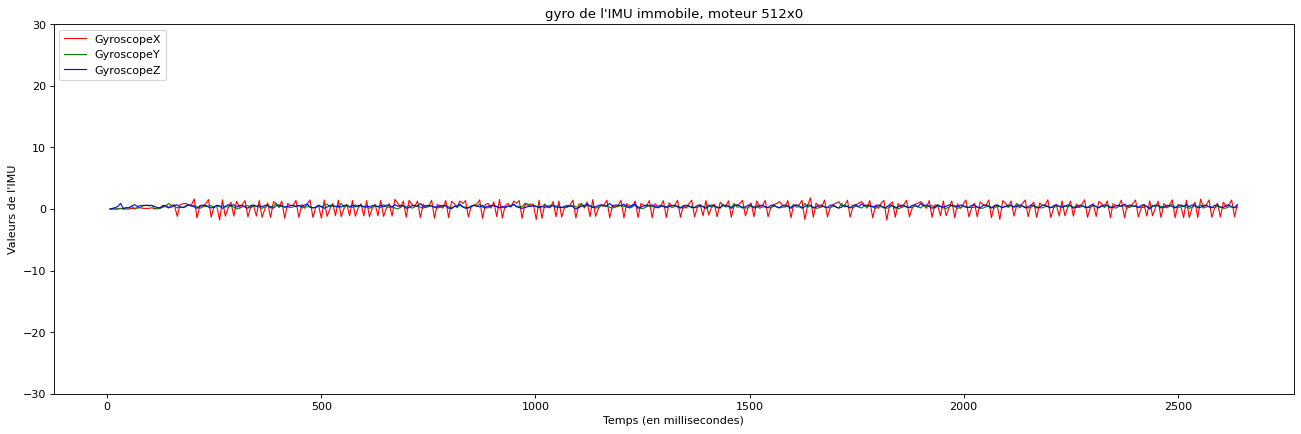


Relevés de l'IMU immobile, moteur 768x0


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
           accX  |      0.027 |      0.520 |     10.780 |     -9.900 |     20.680 |      5.807 |     33.727 |
           accY  |      0.172 |      0.190 |     16.600 |    -14.860 |     31.460 |     10.576 |    111.857 |
           accZ  |     -0.189 |      0.215 |     15.210 |    -16.000 |     31.210 |      9.934 |     98.680 |
          gyroX  |      0.259 |      0.520 |      2.800 |     -1.970 |      4.770 |      1.136 |      1.291 |
          gyroY  |      0.318 |      0.260 |      0.900 |      0.000 |      0.900 |      0.236 |      0.056 |
          gyroZ  |      0.586 |      0.645 |      1.800 |     -1.800 |      3.600 |      0.339 |      0.115 |


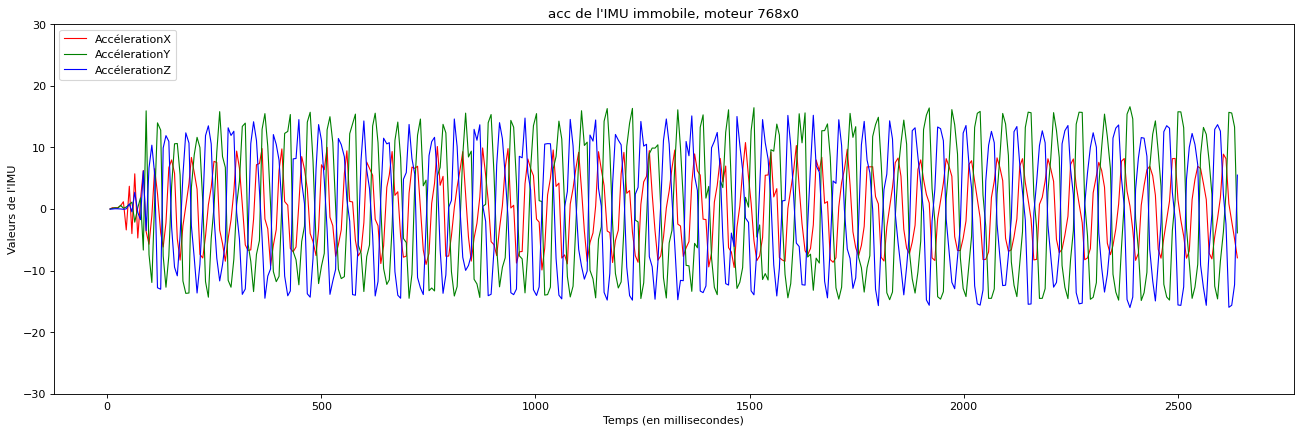

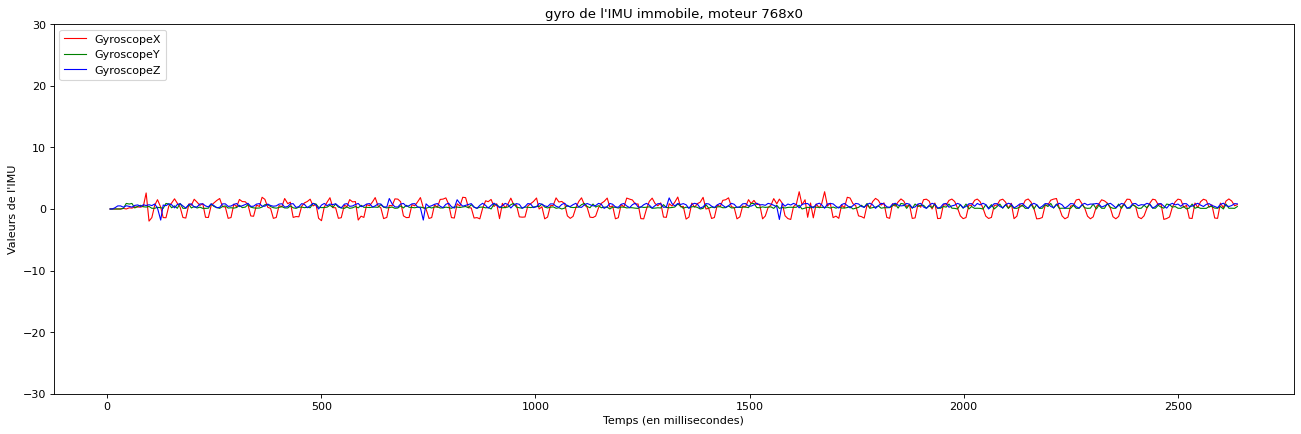

In [5]:
display_data("immobile, moteur 512x0", "imu_immobile_512x0.txt")
display_data("immobile, moteur 768x0", "imu_immobile_768x0.txt")

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accX  |      0.677 |      0.795 |     10.970 |     -9.830 |     20.800 |      4.778 |     22.827 |
    moving_accY  |     -0.090 |      0.490 |     13.910 |    -14.380 |     28.290 |      7.121 |     50.714 |
    moving_accZ  |      0.048 |     -0.030 |     10.690 |     -8.410 |     19.100 |      4.001 |     16.011 |


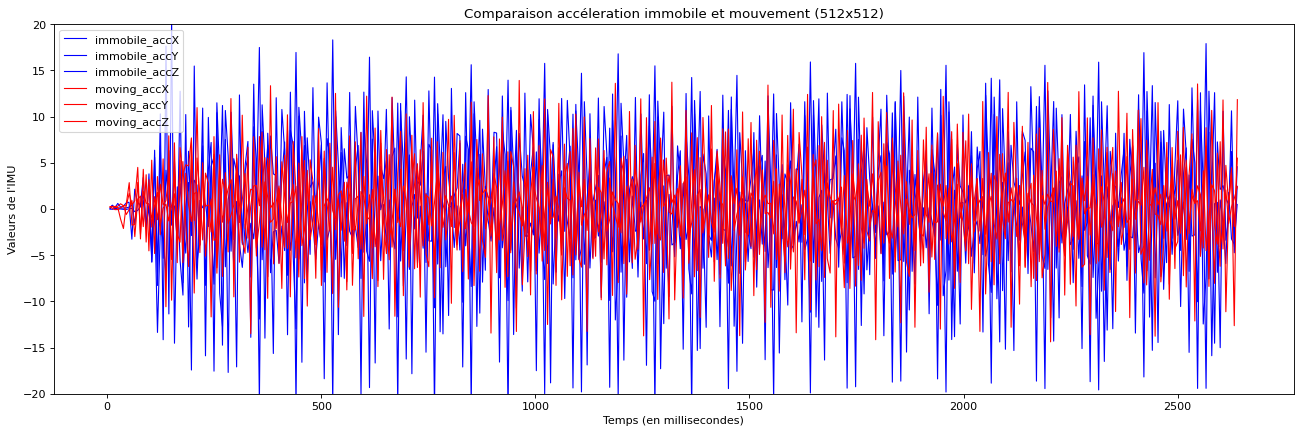

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
    moving_accX  |      0.677 |      0.795 |     10.970 |     -9.830 |     20.800 |      4.778 |     22.827 |


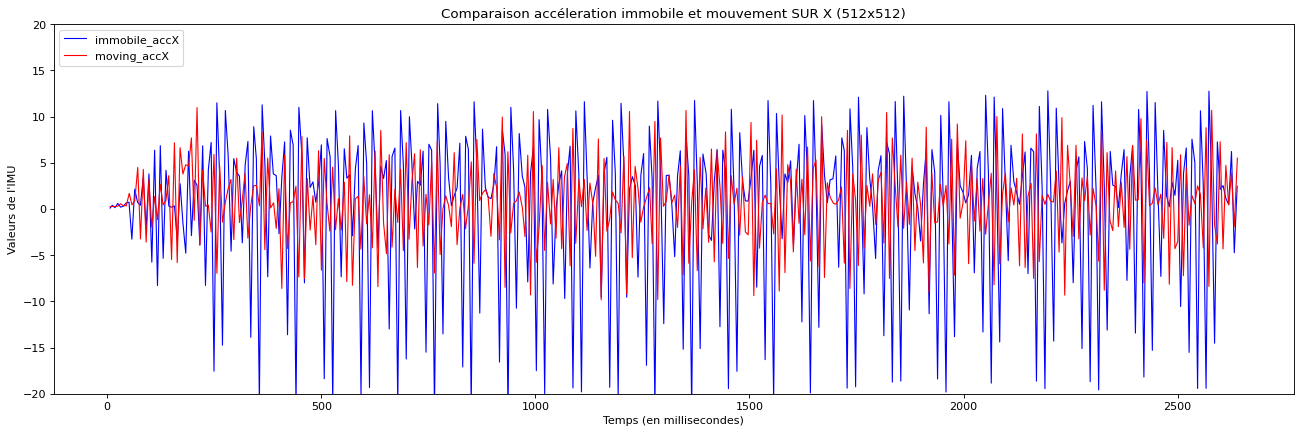

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
    moving_accY  |     -0.090 |      0.490 |     13.910 |    -14.380 |     28.290 |      7.121 |     50.714 |


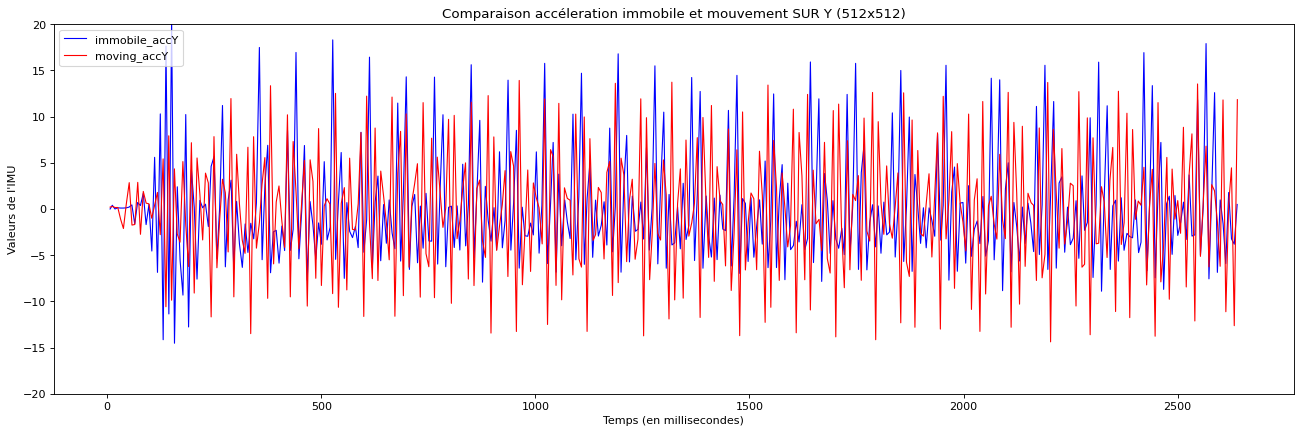

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accZ  |      0.048 |     -0.030 |     10.690 |     -8.410 |     19.100 |      4.001 |     16.011 |


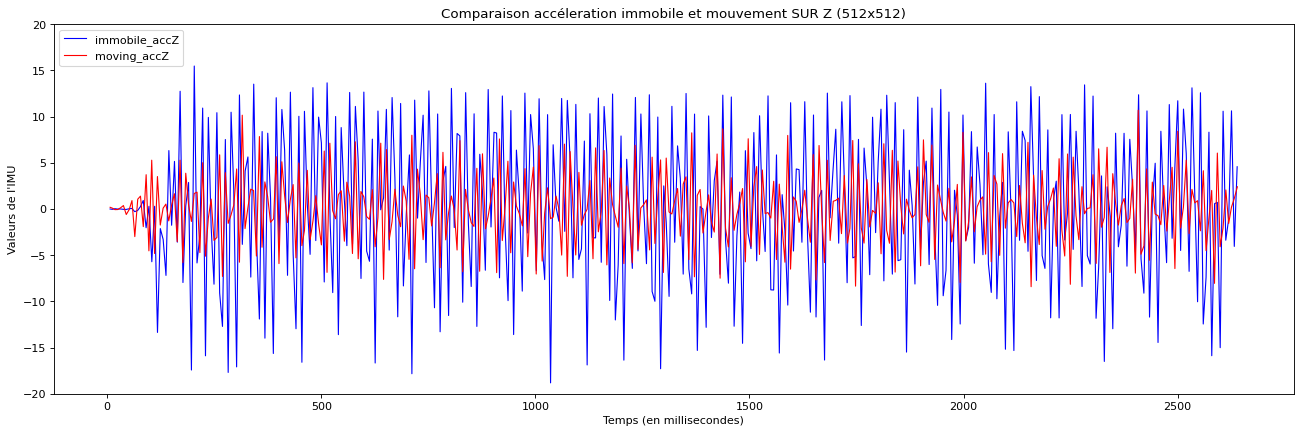

In [12]:

# Compare multiple data sets : acceleration

imm_time, imm_motor_power, imm_accX, imm_accY, imm_accZ, imm_gyroX, imm_gyroY, imm_gyroZ = read_data("imu_immobile_512x512.txt")
dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_deplacement_512x512.txt")

compare_arrays_3d(imm_time, imm_accX, imm_accY, imm_accZ, "immobile_acc", dep_time, dep_accX, dep_accY, dep_accZ, "moving_acc", "Comparaison accéleration immobile et mouvement (512x512)")
compare_arrays(imm_time, imm_accX, "immobile_accX", dep_time, dep_accX, "moving_accX", "Comparaison accéleration immobile et mouvement SUR X (512x512)")
compare_arrays(imm_time, imm_accY, "immobile_accY", dep_time, dep_accY, "moving_accY", "Comparaison accéleration immobile et mouvement SUR Y (512x512)")
compare_arrays(imm_time, imm_accZ, "immobile_accZ", dep_time, dep_accZ, "moving_accZ", "Comparaison accéleration immobile et mouvement SUR Z (512x512)")


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
    immobi_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
    immobi_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
    immobi_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrX  |      0.351 |      0.490 |      1.900 |     -1.900 |      3.800 |      0.724 |      0.525 |
    moving_gyrY  |      0.404 |      0.410 |      0.950 |     -1.700 |      2.650 |      0.257 |      0.066 |
    moving_gyrZ  |      0.355 |      0.460 |      1.800 |     -1.900 |      3.700 |      0.646 |      0.417 |


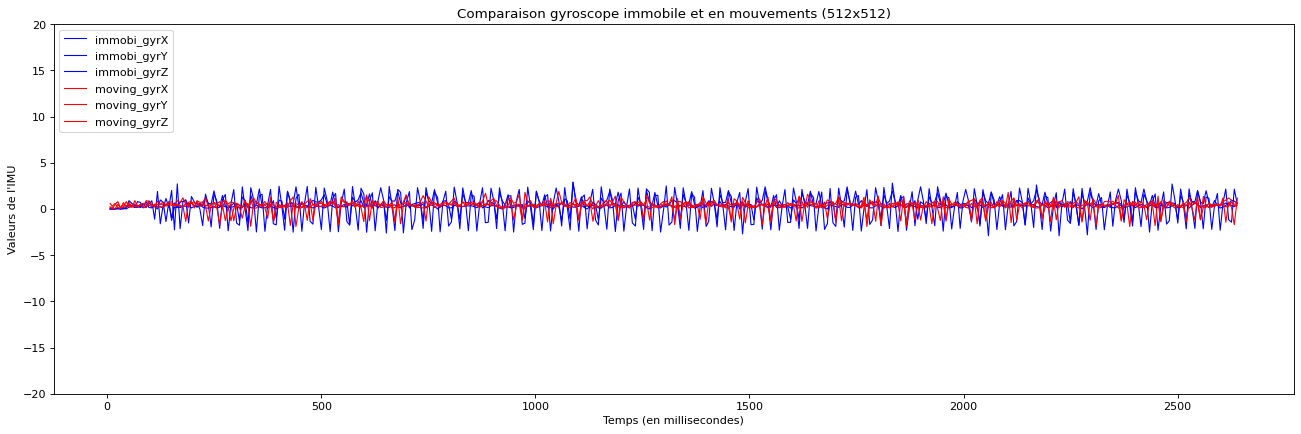

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
    immobi_accX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
    moving_accX  |      0.351 |      0.490 |      1.900 |     -1.900 |      3.800 |      0.724 |      0.525 |


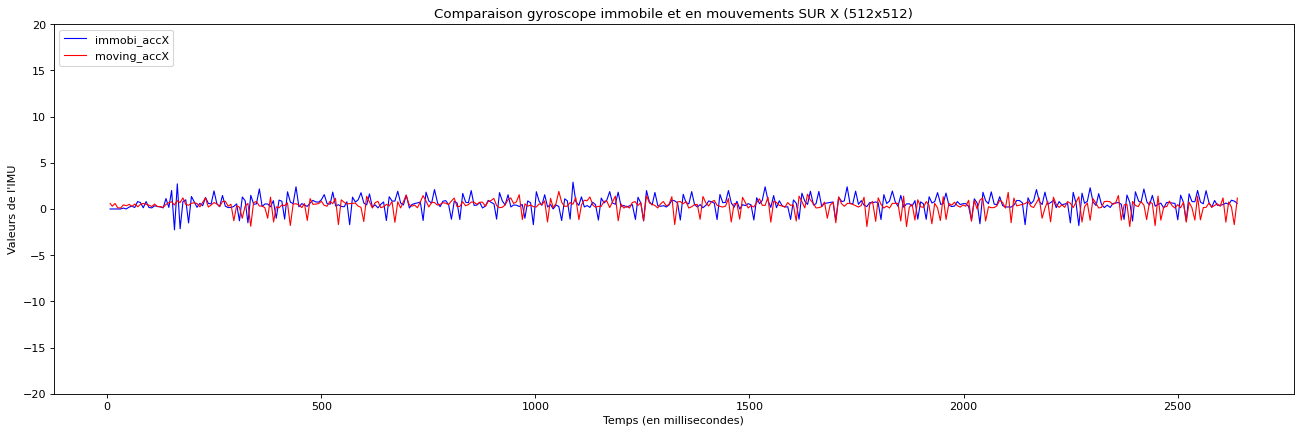

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
    immobi_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
    moving_gyrY  |      0.404 |      0.410 |      0.950 |     -1.700 |      2.650 |      0.257 |      0.066 |


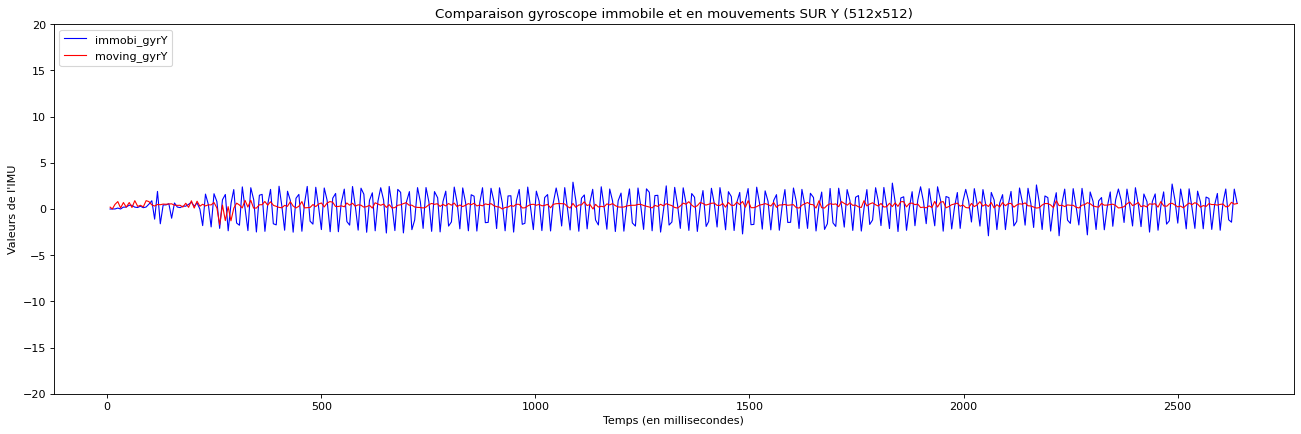

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
    immobi_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrZ  |      0.355 |      0.460 |      1.800 |     -1.900 |      3.700 |      0.646 |      0.417 |


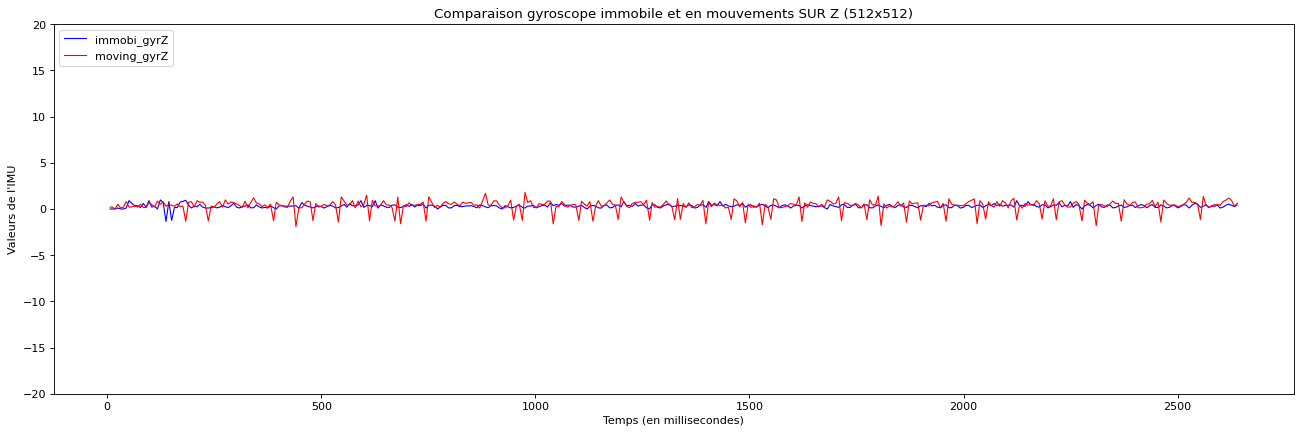

In [13]:

# Compare multiple data sets : gyroscope

imm_time, imm_motor_power, imm_accX, imm_accY, imm_accZ, imm_gyroX, imm_gyroY, imm_gyroZ = read_data("imu_immobile_512x512.txt")
dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_deplacement_512x512.txt")

compare_arrays_3d(imm_time, imm_gyroX, imm_gyroY, imm_gyroZ, "immobi_gyr", dep_time, dep_gyroX, dep_gyroY, dep_gyroZ, "moving_gyr", "Comparaison gyroscope immobile et en mouvements (512x512)")
compare_arrays(imm_time, imm_gyroX, "immobi_accX", dep_time, dep_gyroX, "moving_accX", "Comparaison gyroscope immobile et en mouvements SUR X (512x512)")
compare_arrays(imm_time, imm_gyroY, "immobi_gyrY", dep_time, dep_gyroY, "moving_gyrY", "Comparaison gyroscope immobile et en mouvements SUR Y (512x512)")
compare_arrays(imm_time, imm_gyroZ, "immobi_gyrZ", dep_time, dep_gyroZ, "moving_gyrZ", "Comparaison gyroscope immobile et en mouvements SUR Z (512x512)")


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.088 |      0.420 |     16.480 |    -17.540 |     34.020 |      8.169 |     66.740 |
  immobile_accY  |      0.008 |      0.395 |     27.180 |    -28.600 |     55.780 |     14.435 |    208.359 |
  immobile_accZ  |      0.010 |     -0.095 |     22.170 |    -24.740 |     46.910 |     10.757 |    115.714 |
    moving_accX  |     -0.348 |      0.400 |     17.120 |    -22.800 |     39.920 |      8.279 |     68.538 |
    moving_accY  |      0.037 |      0.300 |     27.530 |    -26.810 |     54.340 |     12.454 |    155.112 |
    moving_accZ  |      0.130 |      0.315 |     20.800 |    -25.590 |     46.390 |      9.776 |     95.566 |


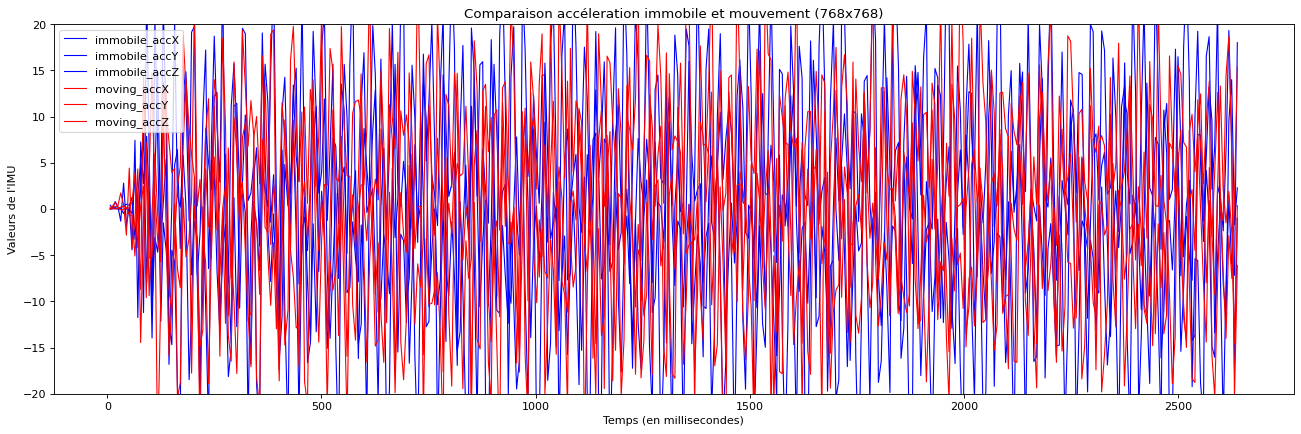

In [187]:
imm_time, imm_motor_power, imm_accX, imm_accY, imm_accZ, imm_gyroX, imm_gyroY, imm_gyroZ = read_data("imu_immobile_768x768.txt")
dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_deplacement_768x768.txt")

compare_arrays_3d(imm_time, imm_accX, imm_accY, imm_accZ, "immobile_acc", dep_time, dep_accX, dep_accY, dep_accZ, "moving_acc", "Comparaison accéleration immobile et mouvement (768x768)")


Relevés de l'IMU Deplacement à la main (moteurs éteints)


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
           accX  |      0.067 |      0.335 |      1.370 |     -2.760 |      4.130 |      0.834 |      0.696 |
           accY  |      0.344 |      0.335 |      0.940 |     -1.460 |      2.400 |      0.269 |      0.072 |
           accZ  |     -0.034 |      0.010 |      0.650 |     -1.090 |      1.740 |      0.324 |      0.105 |
          gyroX  |      0.339 |      0.300 |      0.900 |      0.000 |      0.900 |      0.258 |      0.066 |
          gyroY  |      0.313 |      0.200 |      0.900 |      0.000 |      0.900 |      0.263 |      0.069 |
          gyroZ  |      0.709 |      0.790 |      1.900 |      0.000 |      1.900 |      0.351 |      0.123 |


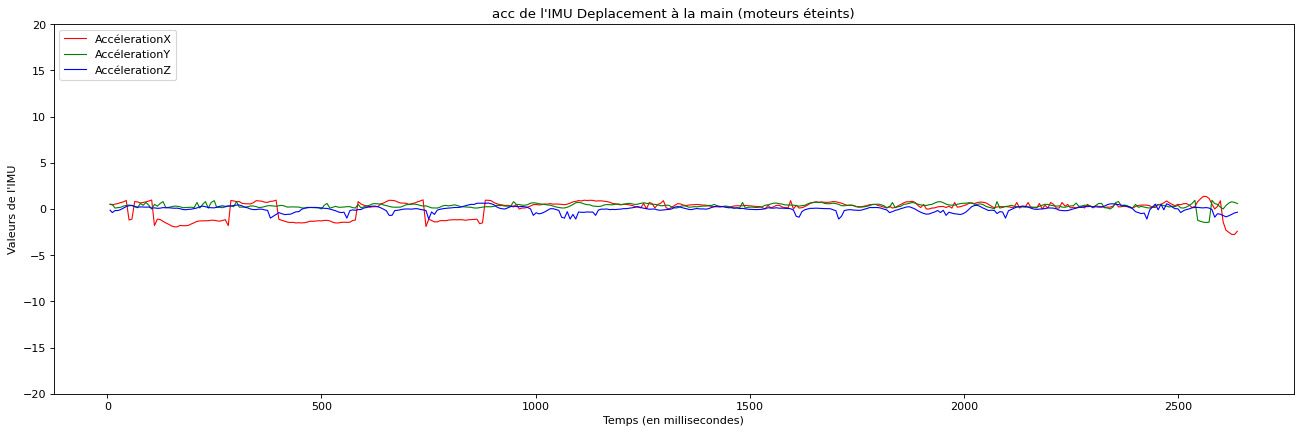

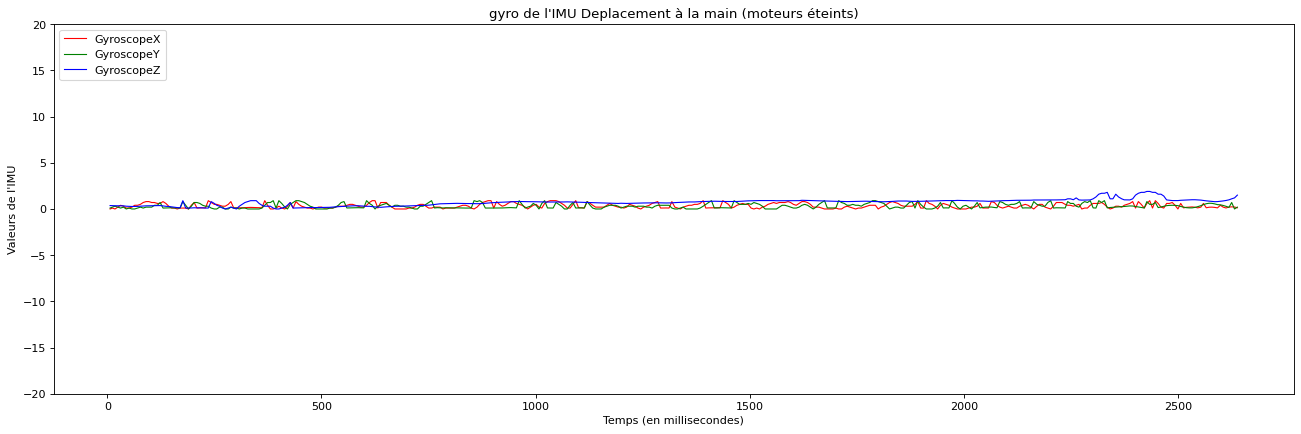


Relevés de l'IMU Secousses à la main (moteurs éteints)


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
           accX  |     -1.761 |     -2.075 |     10.820 |    -18.800 |     29.620 |      8.377 |     70.170 |
           accY  |      0.955 |      3.400 |     13.200 |    -16.990 |     30.190 |      8.873 |     78.736 |
           accZ  |     -0.997 |     -1.110 |      4.280 |     -6.320 |     10.600 |      1.852 |      3.428 |
          gyroX  |      0.338 |      0.520 |      1.900 |     -1.900 |      3.800 |      0.728 |      0.529 |
          gyroY  |      0.464 |      0.480 |      1.900 |     -1.800 |      3.700 |      0.486 |      0.237 |
          gyroZ  |      0.184 |      0.665 |      4.600 |     -4.900 |      9.500 |      2.774 |      7.695 |


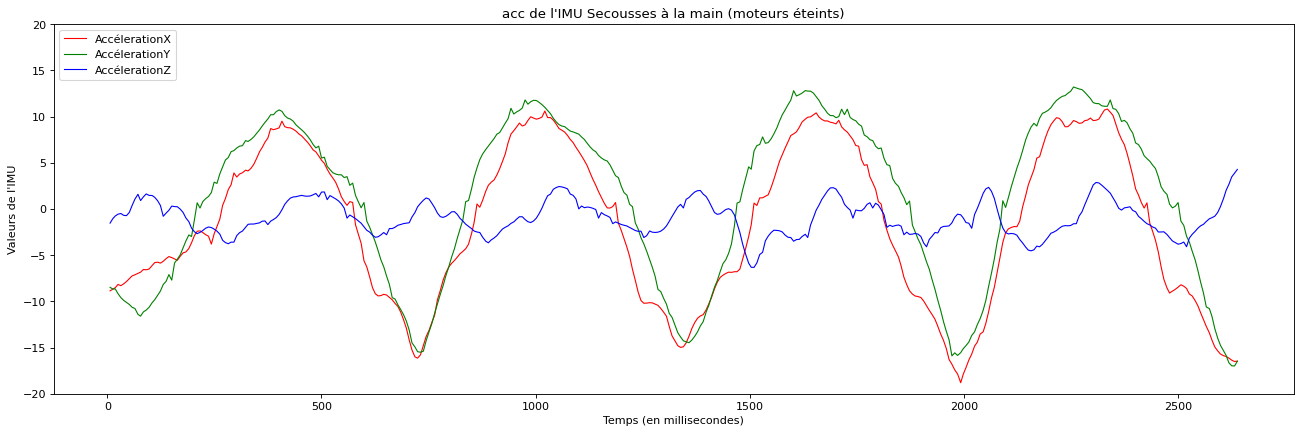

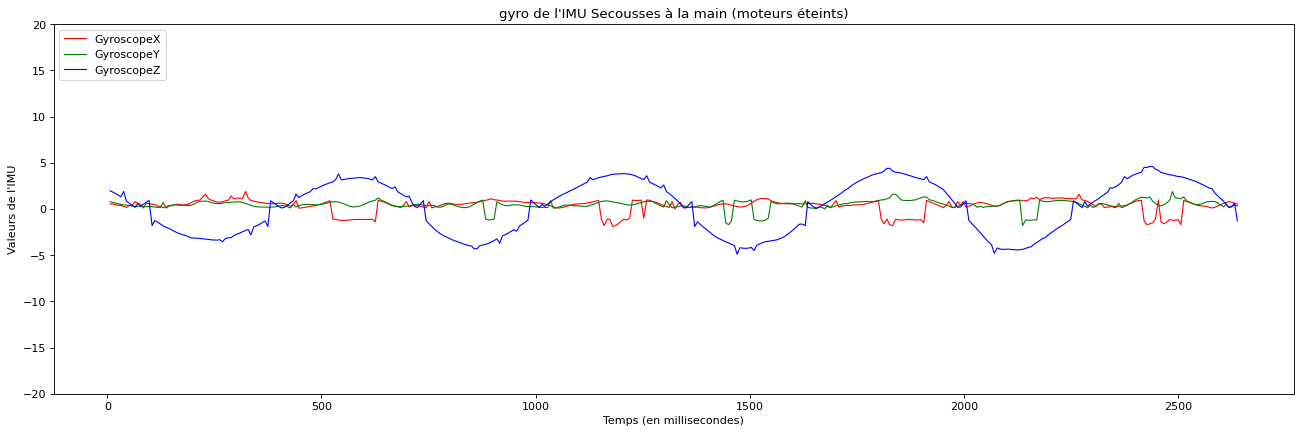


Relevés de l'IMU immobile, moteur 512x512


Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
           accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
           accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
           accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
          gyroX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
          gyroY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
          gyroZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |


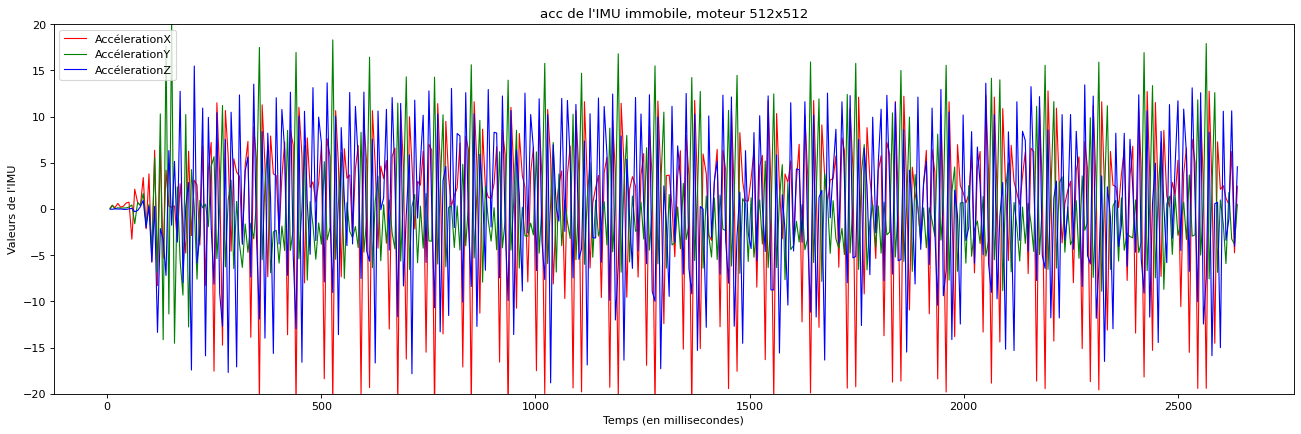

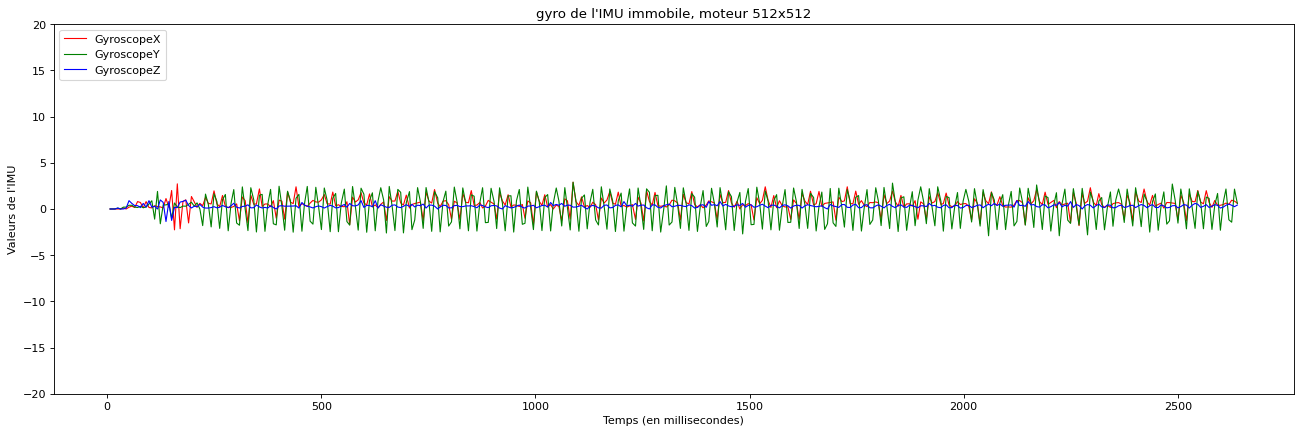

In [6]:
Y_MAX =  20.0
Y_MIN = -Y_MAX

display_data("Deplacement à la main (moteurs éteints)", "imu_deplacement_moteurs_eteints.txt")
display_data("Secousses à la main (moteurs éteints)", "imu_secousses_moteurs_eteints.txt")
display_data("immobile, moteur 512x512", "imu_immobile_512x512.txt")

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accX  |      0.067 |      0.335 |      1.370 |     -2.760 |      4.130 |      0.834 |      0.696 |
    moving_accY  |      0.344 |      0.335 |      0.940 |     -1.460 |      2.400 |      0.269 |      0.072 |
    moving_accZ  |     -0.034 |      0.010 |      0.650 |     -1.090 |      1.740 |      0.324 |      0.105 |


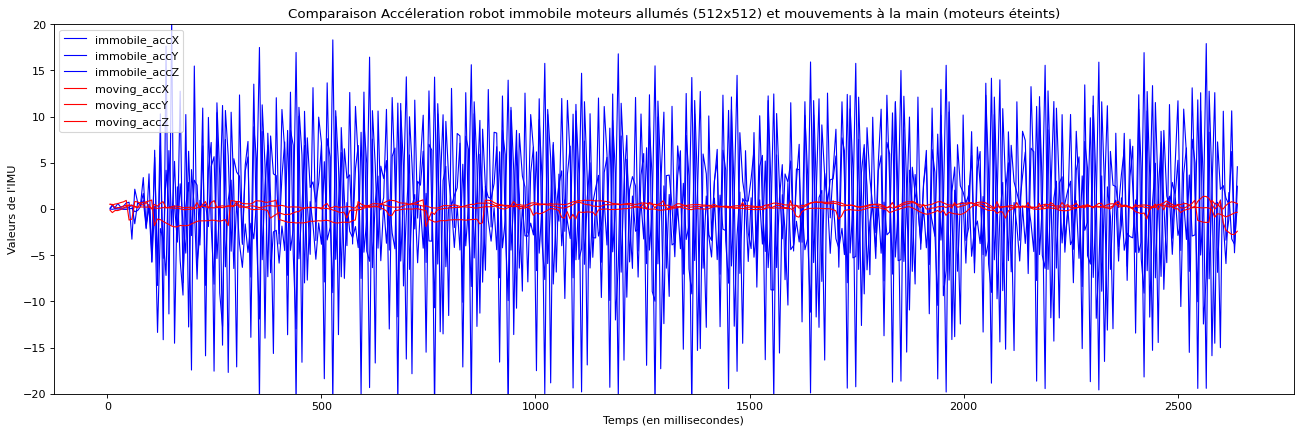

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
  immobile_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
  immobile_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrX  |      0.339 |      0.300 |      0.900 |      0.000 |      0.900 |      0.258 |      0.066 |
    moving_gyrY  |      0.313 |      0.200 |      0.900 |      0.000 |      0.900 |      0.263 |      0.069 |
    moving_gyrZ  |      0.709 |      0.790 |      1.900 |      0.000 |      1.900 |      0.351 |      0.123 |


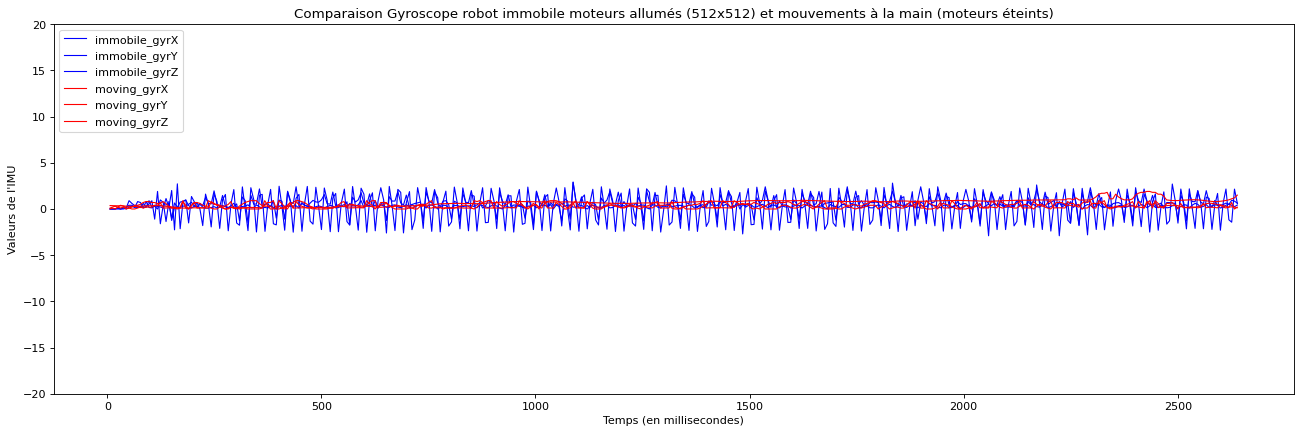

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accX  |     -1.761 |     -2.075 |     10.820 |    -18.800 |     29.620 |      8.377 |     70.170 |
    moving_accY  |      0.955 |      3.400 |     13.200 |    -16.990 |     30.190 |      8.873 |     78.736 |
    moving_accZ  |     -0.997 |     -1.110 |      4.280 |     -6.320 |     10.600 |      1.852 |      3.428 |


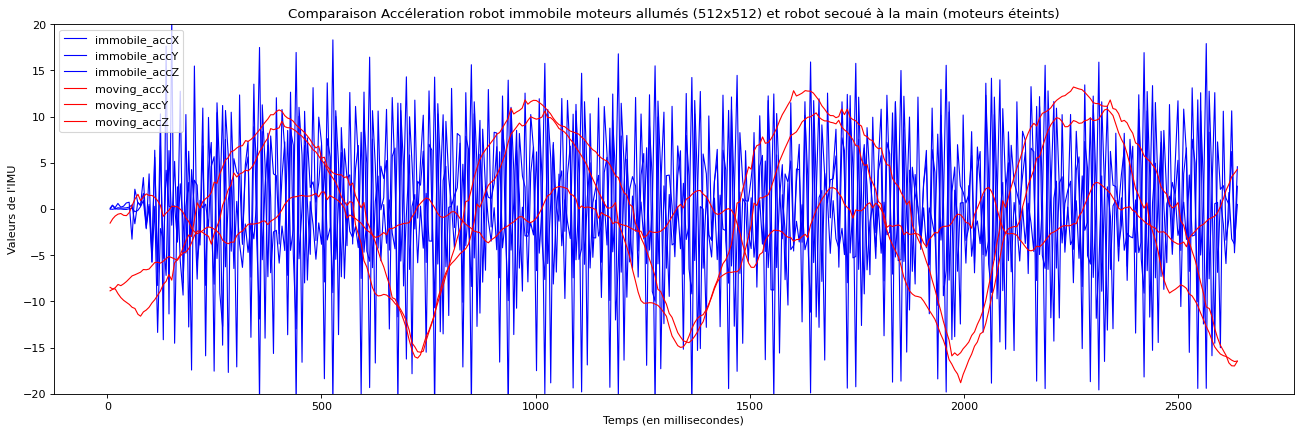

Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
  immobile_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
  immobile_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrX  |      0.338 |      0.520 |      1.900 |     -1.900 |      3.800 |      0.728 |      0.529 |
    moving_gyrY  |      0.464 |      0.480 |      1.900 |     -1.800 |      3.700 |      0.486 |      0.237 |
    moving_gyrZ  |      0.184 |      0.665 |      4.600 |     -4.900 |      9.500 |      2.774 |      7.695 |


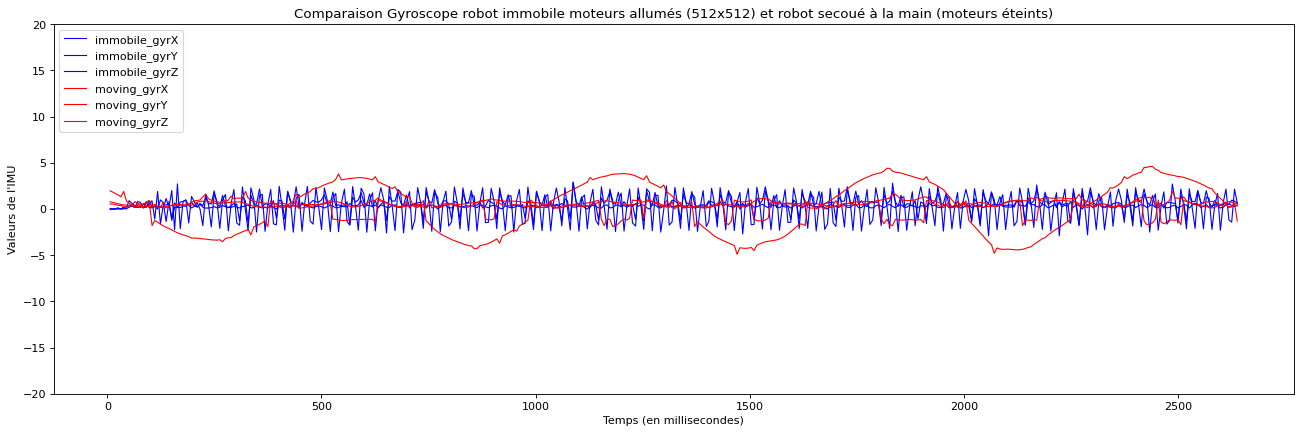

In [3]:
Y_MAX =  20.0
Y_MIN = -Y_MAX

imm_time, imm_motor_power, imm_accX, imm_accY, imm_accZ, imm_gyroX, imm_gyroY, imm_gyroZ = read_data("imu_immobile_512x512.txt")
dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_deplacement_moteurs_eteints.txt")

compare_arrays_3d(imm_time, imm_accX, imm_accY, imm_accZ, "immobile_acc", dep_time, dep_accX, dep_accY, dep_accZ, "moving_acc", "Comparaison Accéleration robot immobile moteurs allumés (512x512) et mouvements à la main (moteurs éteints)")
compare_arrays_3d(imm_time, imm_gyroX, imm_gyroY, imm_gyroZ, "immobile_gyr", dep_time, dep_gyroX, dep_gyroY, dep_gyroZ, "moving_gyr", "Comparaison Gyroscope robot immobile moteurs allumés (512x512) et mouvements à la main (moteurs éteints)")

dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_secousses_moteurs_eteints.txt")
compare_arrays_3d(imm_time, imm_accX, imm_accY, imm_accZ, "immobile_acc", dep_time, dep_accX, dep_accY, dep_accZ, "moving_acc", "Comparaison Accéleration robot immobile moteurs allumés (512x512) et robot secoué à la main (moteurs éteints)")
compare_arrays_3d(imm_time, imm_gyroX, imm_gyroY, imm_gyroZ, "immobile_gyr", dep_time, dep_gyroX, dep_gyroY, dep_gyroZ, "moving_gyr", "Comparaison Gyroscope robot immobile moteurs allumés (512x512) et robot secoué à la main (moteurs éteints)")




COMPARAISON {MOTEURS ALLUMES ROBOT IMMOBILE} AVEC {MOTEURS ALLUMES ROBOT BOUGE A LA MAIN}


########################################################################
################ MOUVEMENTS A LA MAIN MOTEURS ALLUMES ##################
########################################################################

>>>>>>>>>>>>>>>>>>> ACCELERATION <<<<<<<<<<<<<<<<<<<<
>>>>>> ALL AXES:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accX  |     -1.096 |     -1.310 |     10.720 |    -13.880 |     24.600 |      5.188 |     26.916 |
    moving_accY  |      0.866 |      0.9

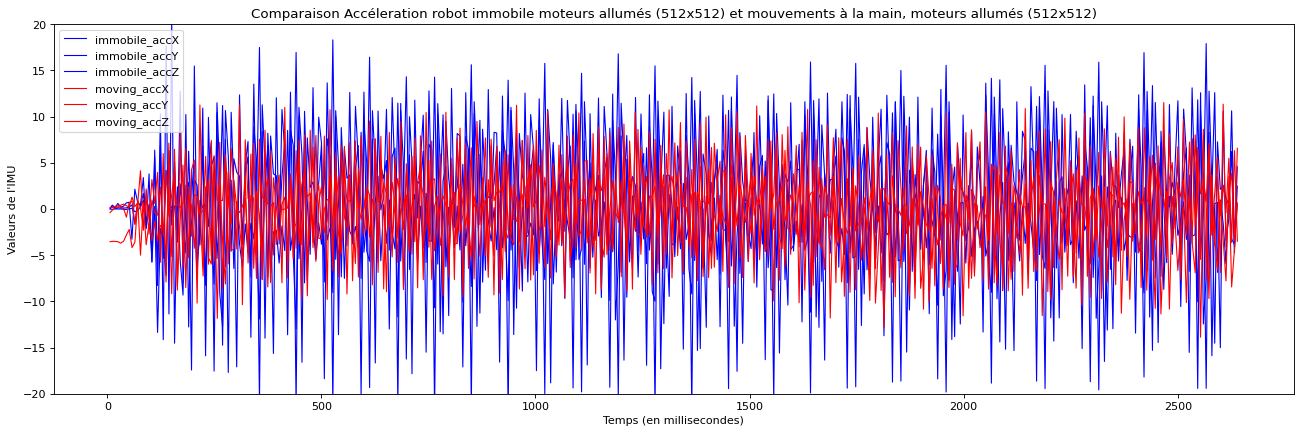

>>>>>> X AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
    moving_accX  |     -1.096 |     -1.310 |     10.720 |    -13.880 |     24.600 |      5.188 |     26.916 |


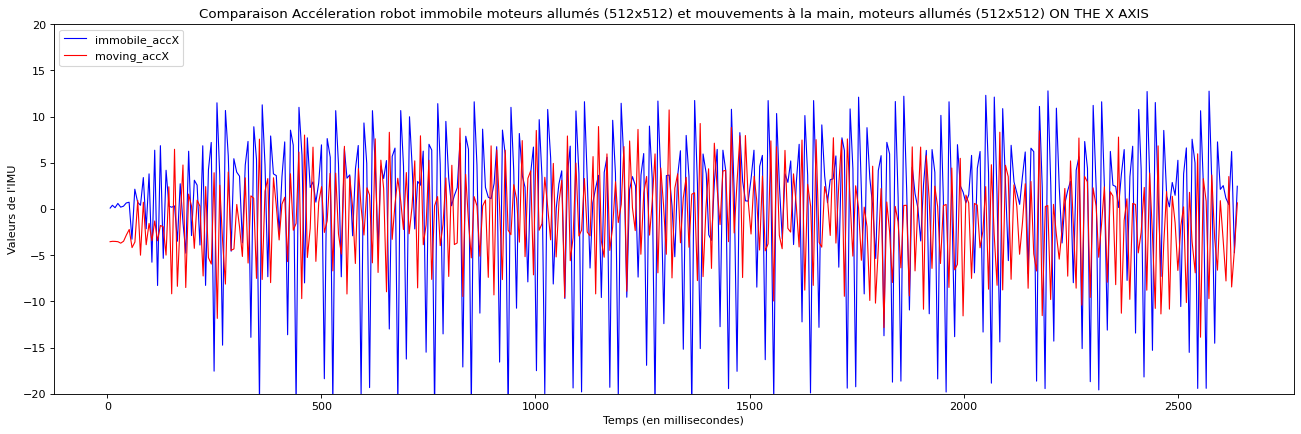

>>>>>> Y AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
    moving_accY  |      0.866 |      0.900 |     11.340 |    -11.800 |     23.140 |      5.175 |     26.785 |


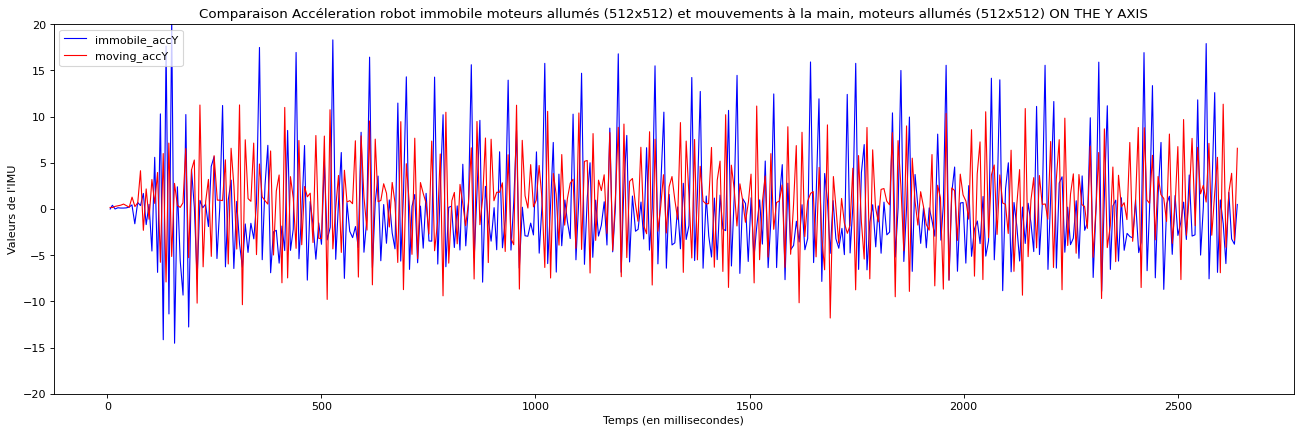

>>>>>> Z AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accZ  |      0.091 |      0.150 |     11.520 |    -10.070 |     21.590 |      4.626 |     21.403 |


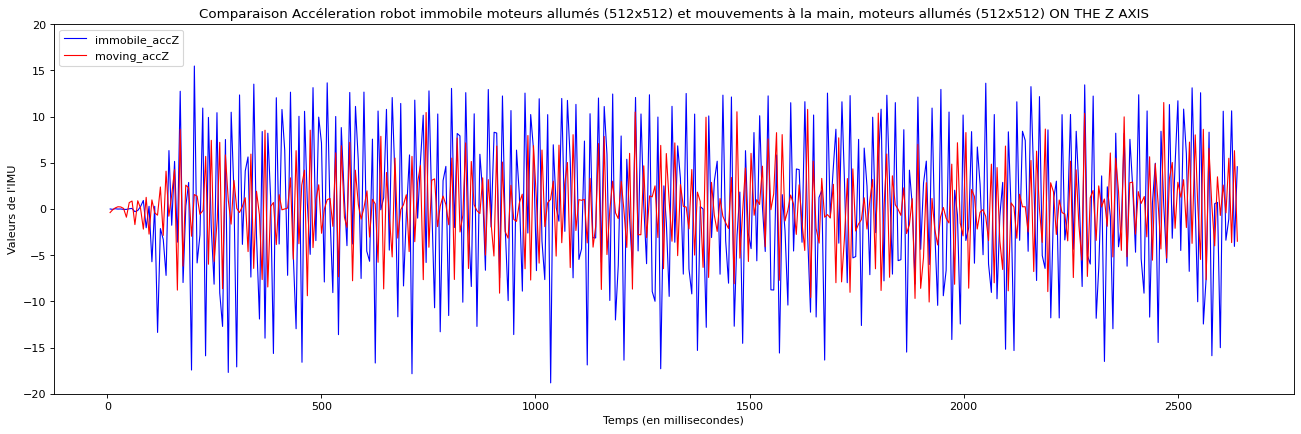

>>>>>>>>>>>>>>>>>>> GYROSCOPE <<<<<<<<<<<<<<<<<<<<
>>>>>> ALL AXES:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
  immobile_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
  immobile_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrX  |      0.277 |      0.390 |      1.810 |     -2.500 |      4.310 |      0.825 |      0.680 |
    moving_gyrY  |      0.445 |      0.440 |      1.400 |     -1.600 |      3.000 |      0.351 |      0.123 |
    moving_gyrZ  |     -0.606 |     -1.100 |      0.970 |     -2.900 |      3.870 |      1.134 |      1.287 |


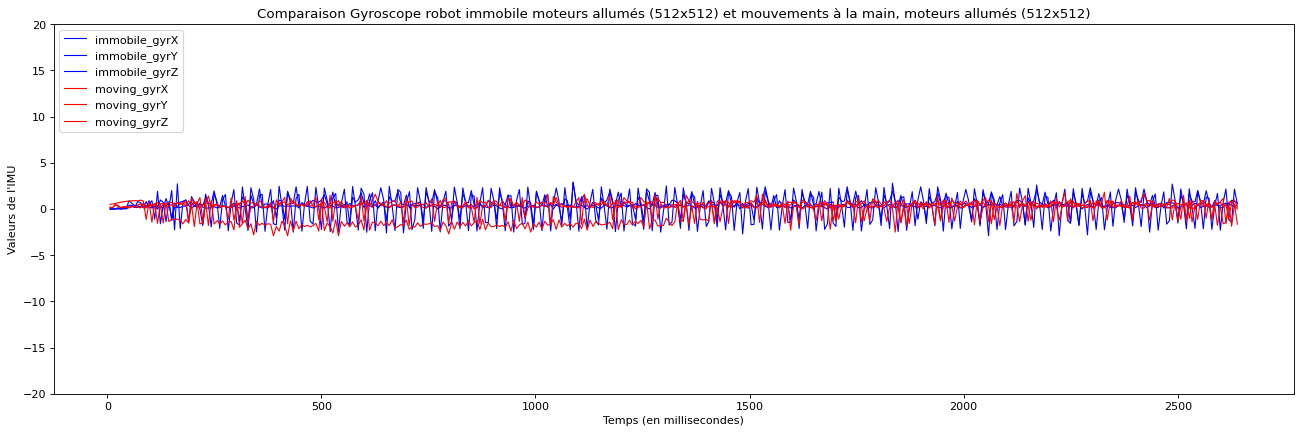

>>>>>> X AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
    moving_gyrX  |      0.277 |      0.390 |      1.810 |     -2.500 |      4.310 |      0.825 |      0.680 |


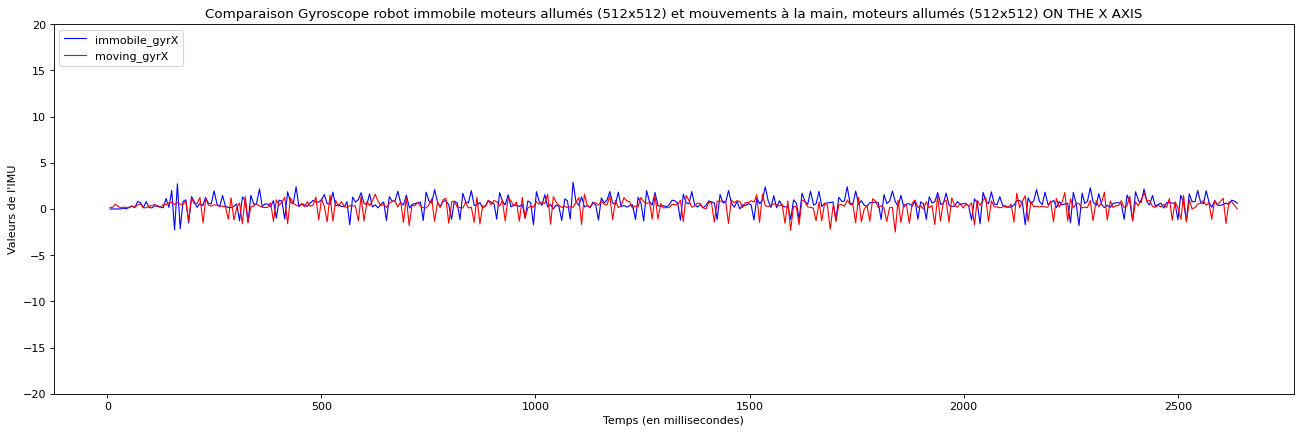

>>>>>> Y AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
    moving_gyrY  |      0.445 |      0.440 |      1.400 |     -1.600 |      3.000 |      0.351 |      0.123 |


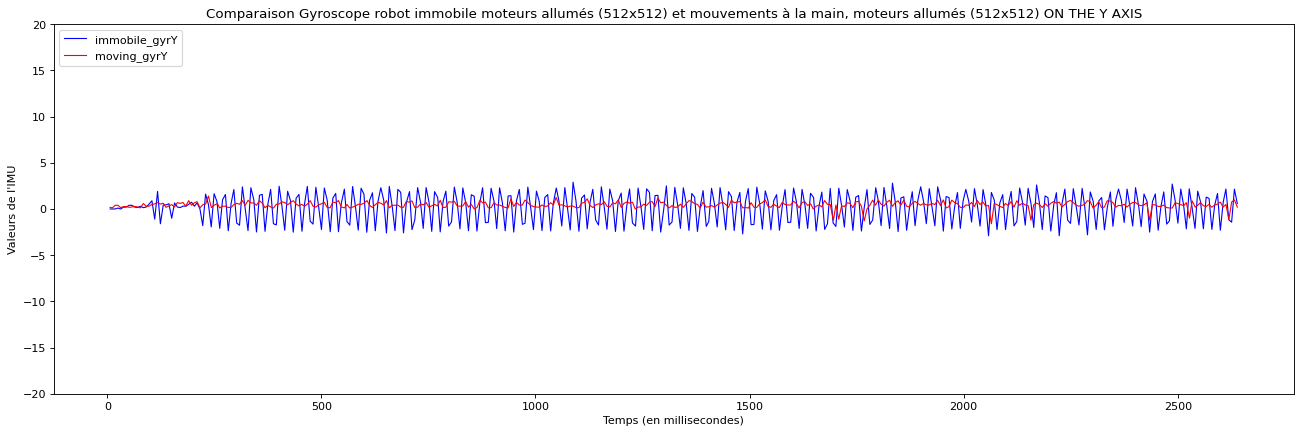

>>>>>> Z AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrZ  |     -0.606 |     -1.100 |      0.970 |     -2.900 |      3.870 |      1.134 |      1.287 |


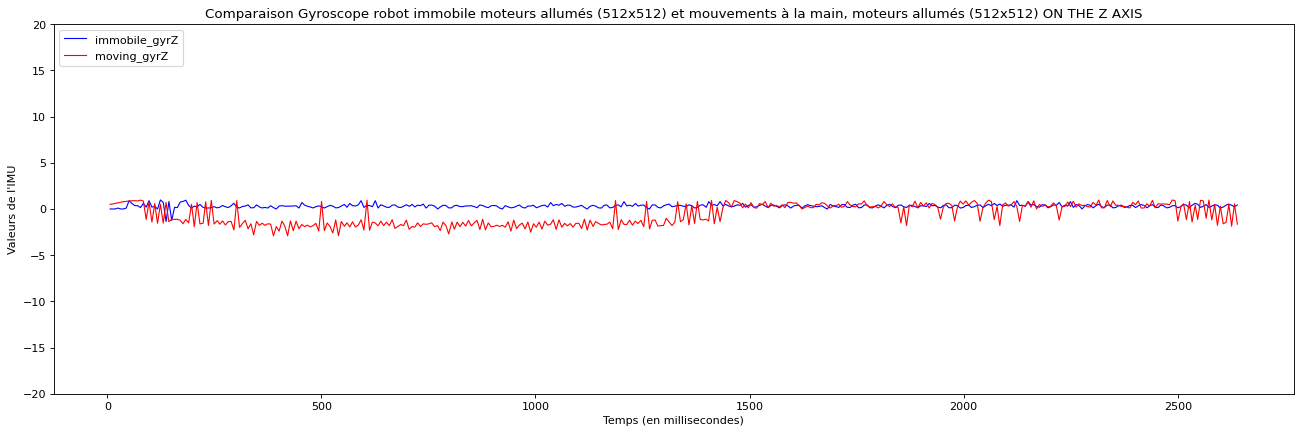


########################################################################
################ SECOUSSES A LA MAIN MOTEURS ALLUMES ###################
########################################################################

>>>>>>>>>>>>>>>>>>> ACCELERATION <<<<<<<<<<<<<<<<<<<<
>>>>>> ALL AXES:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accX  |     -0.734 |     -1.515 |     17.640 |    -18.700 |     36.340 |      7.931 |     62.898 |
    moving_accY  |      2.321 |      2.415 |     17.230 |    -13.630 |     30.860 |      6.721 |     45.176 |
    moving_accZ  |    

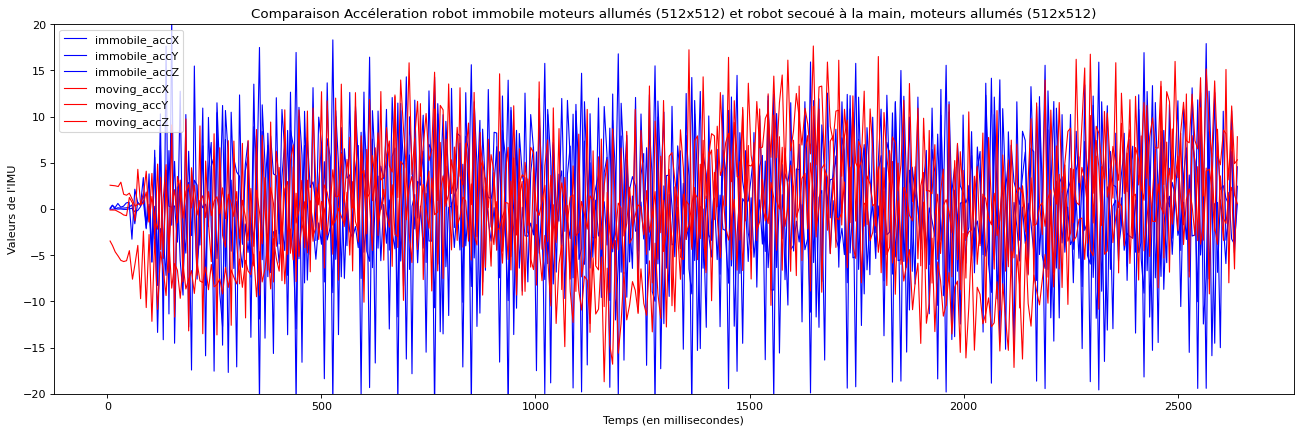

>>>>>> X AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accX  |      0.057 |      2.950 |     12.780 |    -22.280 |     35.060 |      9.128 |     83.321 |
    moving_accX  |     -0.734 |     -1.515 |     17.640 |    -18.700 |     36.340 |      7.931 |     62.898 |


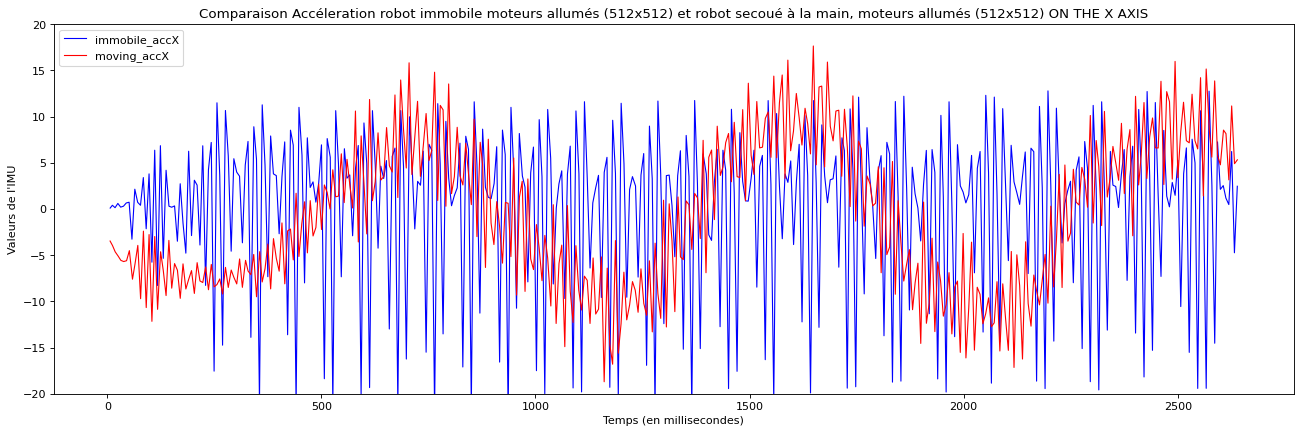

>>>>>> Y AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accY  |      0.136 |      0.000 |     20.420 |    -14.530 |     34.950 |      6.313 |     39.849 |
    moving_accY  |      2.321 |      2.415 |     17.230 |    -13.630 |     30.860 |      6.721 |     45.176 |


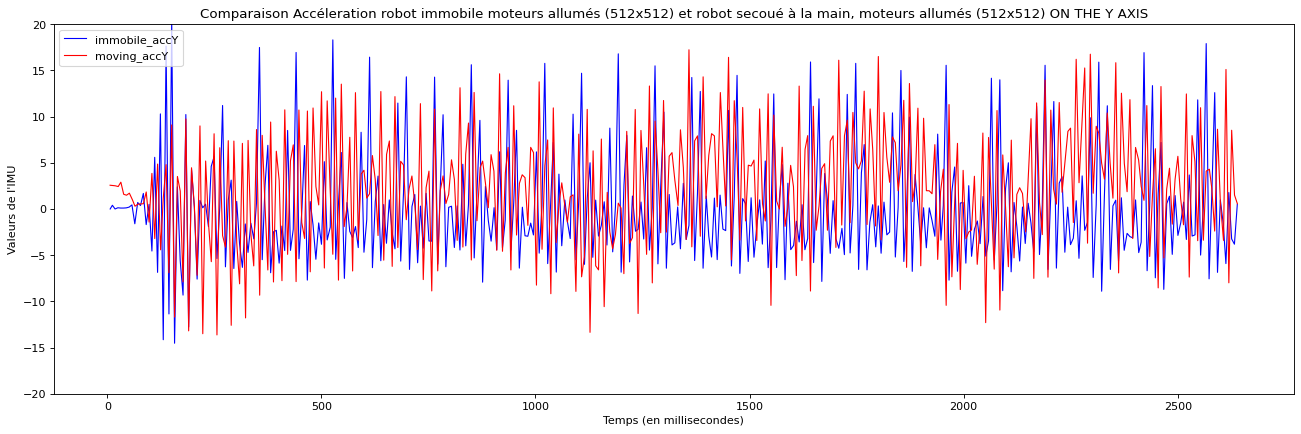

>>>>>> Z AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_accZ  |      0.194 |      0.000 |     15.470 |    -18.820 |     34.290 |      8.667 |     75.122 |
    moving_accZ  |     -0.292 |     -0.295 |     10.800 |    -10.850 |     21.650 |      4.199 |     17.634 |


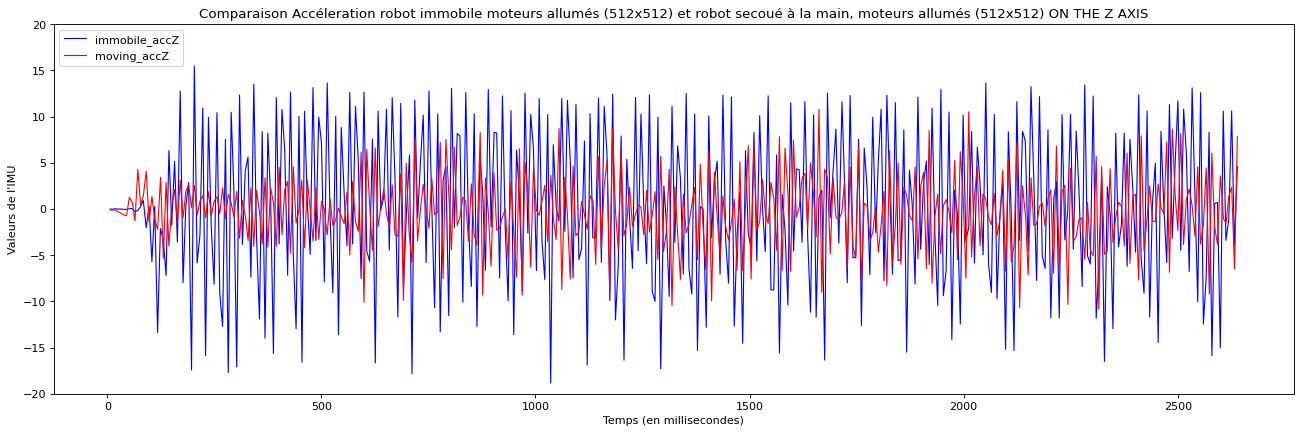

>>>>>>>>>>>>>>>>>>> GYROSCOPE <<<<<<<<<<<<<<<<<<<<
>>>>>> ALL AXES:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
  immobile_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
  immobile_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrX  |      0.343 |      0.485 |      2.290 |     -1.940 |      4.230 |      0.901 |      0.812 |
    moving_gyrY  |      0.443 |      0.435 |      1.800 |     -1.800 |      3.600 |      0.443 |      0.196 |
    moving_gyrZ  |     -0.016 |      0.435 |      4.730 |     -4.890 |      9.620 |      2.658 |      7.063 |


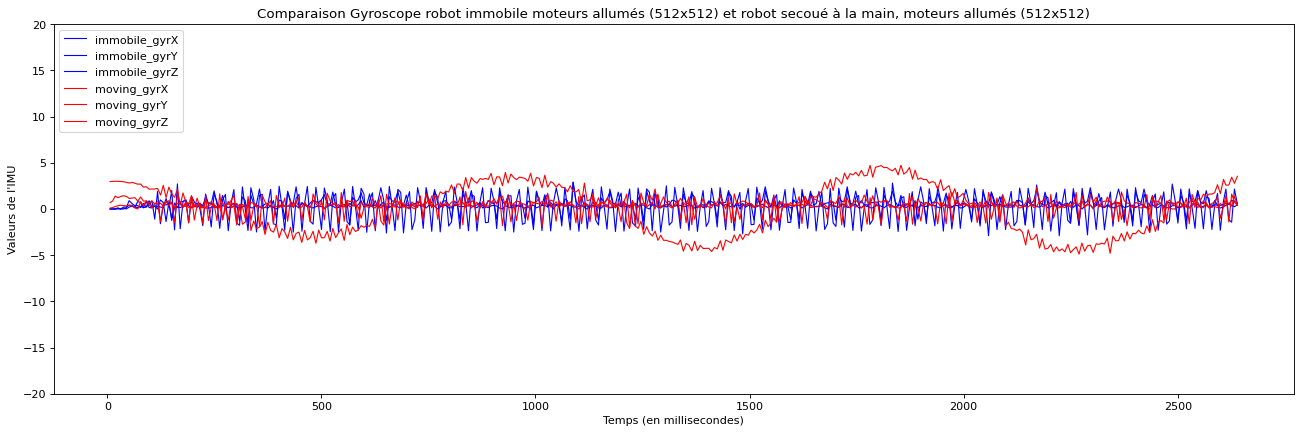

>>>>>> X AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrX  |      0.579 |      0.590 |      2.900 |     -2.260 |      5.160 |      0.817 |      0.667 |
    moving_gyrX  |      0.343 |      0.485 |      2.290 |     -1.940 |      4.230 |      0.901 |      0.812 |


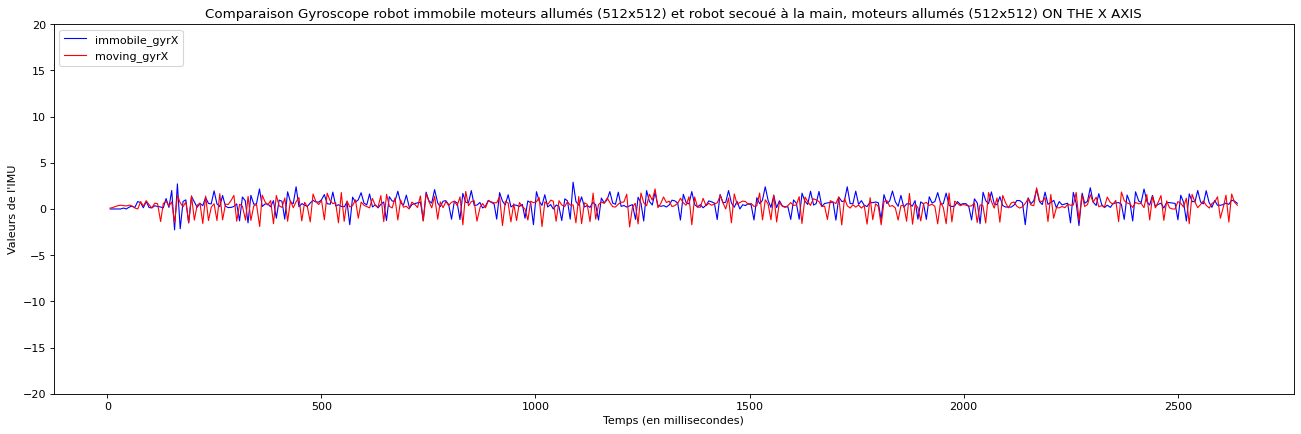

>>>>>> Y AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrY  |      0.131 |      0.540 |      2.900 |     -2.900 |      5.800 |      1.695 |      2.871 |
    moving_gyrY  |      0.443 |      0.435 |      1.800 |     -1.800 |      3.600 |      0.443 |      0.196 |


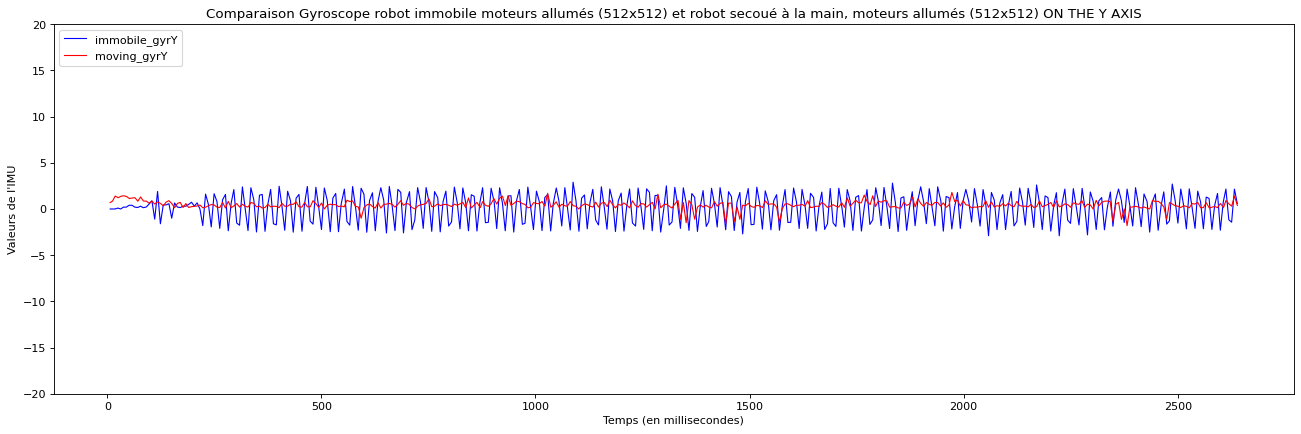

>>>>>> Z AXIS:
Valeurs sur les relevés :
          Valeur |    Moyenne |    Mediane |        Max |        Min |  Amplitude | Ecart-type |   Variance |
  immobile_gyrZ  |      0.316 |      0.330 |      0.980 |     -1.360 |      2.340 |      0.211 |      0.044 |
    moving_gyrZ  |     -0.016 |      0.435 |      4.730 |     -4.890 |      9.620 |      2.658 |      7.063 |


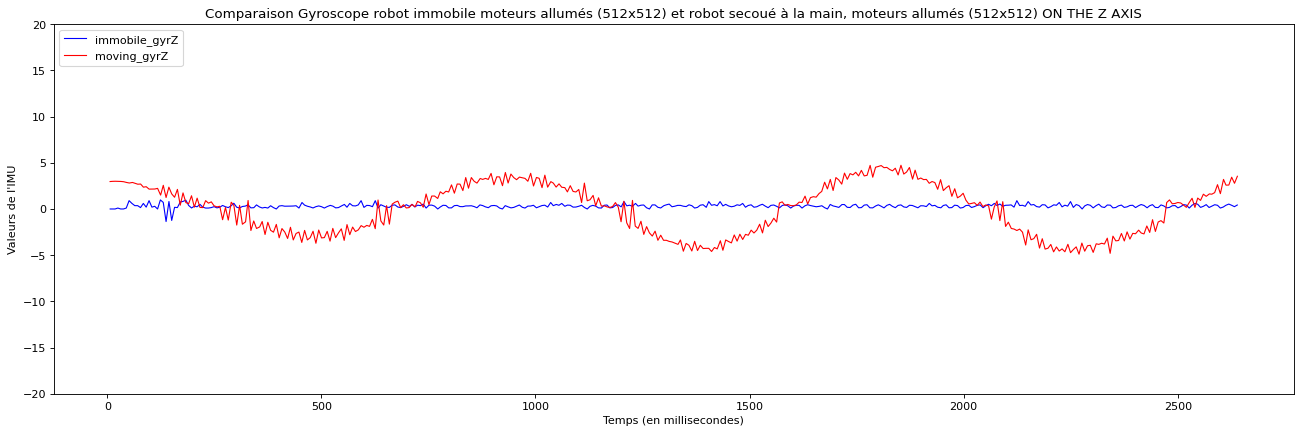

In [11]:
Y_MAX =  20.0
Y_MIN = -Y_MAX

imm_time, imm_motor_power, imm_accX, imm_accY, imm_accZ, imm_gyroX, imm_gyroY, imm_gyroZ = read_data("imu_immobile_512x512.txt")
dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_deplacement_main_512x512.txt")

print("\nCOMPARAISON {MOTEURS ALLUMES ROBOT IMMOBILE} AVEC {MOTEURS ALLUMES ROBOT BOUGE A LA MAIN}\n")

print("\n########################################################################")
print("################ MOUVEMENTS A LA MAIN MOTEURS ALLUMES ##################")
print("########################################################################\n")
print(">>>>>>>>>>>>>>>>>>> ACCELERATION <<<<<<<<<<<<<<<<<<<<")
title = "Comparaison Accéleration robot immobile moteurs allumés (512x512) et mouvements à la main, moteurs allumés (512x512)"
print(">>>>>> ALL AXES:")
compare_arrays_3d(imm_time, imm_accX, imm_accY, imm_accZ, "immobile_acc", dep_time, dep_accX, dep_accY, dep_accZ, "moving_acc", f"{title}")
print(">>>>>> X AXIS:")
compare_arrays(imm_time, imm_accX, "immobile_accX", dep_time, dep_accX, "moving_accX", f"{title} ON THE X AXIS")
print(">>>>>> Y AXIS:")
compare_arrays(imm_time, imm_accY, "immobile_accY", dep_time, dep_accY, "moving_accY", f"{title} ON THE Y AXIS")
print(">>>>>> Z AXIS:")
compare_arrays(imm_time, imm_accZ, "immobile_accZ", dep_time, dep_accZ, "moving_accZ", f"{title} ON THE Z AXIS")
print(">>>>>>>>>>>>>>>>>>> GYROSCOPE <<<<<<<<<<<<<<<<<<<<")
print(">>>>>> ALL AXES:")
title = "Comparaison Gyroscope robot immobile moteurs allumés (512x512) et mouvements à la main, moteurs allumés (512x512)"
compare_arrays_3d(imm_time, imm_gyroX, imm_gyroY, imm_gyroZ, "immobile_gyr", dep_time, dep_gyroX, dep_gyroY, dep_gyroZ, "moving_gyr", f"{title}")
print(">>>>>> X AXIS:")
compare_arrays(imm_time, imm_gyroX, "immobile_gyrX", dep_time, dep_gyroX, "moving_gyrX", f"{title} ON THE X AXIS")
print(">>>>>> Y AXIS:")
compare_arrays(imm_time, imm_gyroY, "immobile_gyrY", dep_time, dep_gyroY, "moving_gyrY", f"{title} ON THE Y AXIS")
print(">>>>>> Z AXIS:")
compare_arrays(imm_time, imm_gyroZ, "immobile_gyrZ", dep_time, dep_gyroZ, "moving_gyrZ", f"{title} ON THE Z AXIS")

dep_time, dep_motor_power, dep_accX, dep_accY, dep_accZ, dep_gyroX, dep_gyroY, dep_gyroZ = read_data("imu_secousses_main_512x512.txt")
print("\n########################################################################")
print("################ SECOUSSES A LA MAIN MOTEURS ALLUMES ###################")
print("########################################################################\n")
print(">>>>>>>>>>>>>>>>>>> ACCELERATION <<<<<<<<<<<<<<<<<<<<")
print(">>>>>> ALL AXES:")
title = "Comparaison Accéleration robot immobile moteurs allumés (512x512) et robot secoué à la main, moteurs allumés (512x512)"
compare_arrays_3d(imm_time, imm_accX, imm_accY, imm_accZ, "immobile_acc", dep_time, dep_accX, dep_accY, dep_accZ, "moving_acc", f"{title}")
print(">>>>>> X AXIS:")
compare_arrays(imm_time, imm_accX, "immobile_accX", dep_time, dep_accX, "moving_accX", f"{title} ON THE X AXIS")
print(">>>>>> Y AXIS:")
compare_arrays(imm_time, imm_accY, "immobile_accY", dep_time, dep_accY, "moving_accY", f"{title} ON THE Y AXIS")
print(">>>>>> Z AXIS:")
compare_arrays(imm_time, imm_accZ, "immobile_accZ", dep_time, dep_accZ, "moving_accZ", f"{title} ON THE Z AXIS")
print(">>>>>>>>>>>>>>>>>>> GYROSCOPE <<<<<<<<<<<<<<<<<<<<")
print(">>>>>> ALL AXES:")
title = "Comparaison Gyroscope robot immobile moteurs allumés (512x512) et robot secoué à la main, moteurs allumés (512x512)"
compare_arrays_3d(imm_time, imm_gyroX, imm_gyroY, imm_gyroZ, "immobile_gyr", dep_time, dep_gyroX, dep_gyroY, dep_gyroZ, "moving_gyr", f"{title}")
print(">>>>>> X AXIS:")
compare_arrays(imm_time, imm_gyroX, "immobile_gyrX", dep_time, dep_gyroX, "moving_gyrX", f"{title} ON THE X AXIS")
print(">>>>>> Y AXIS:")
compare_arrays(imm_time, imm_gyroY, "immobile_gyrY", dep_time, dep_gyroY, "moving_gyrY", f"{title} ON THE Y AXIS")
print(">>>>>> Z AXIS:")
compare_arrays(imm_time, imm_gyroZ, "immobile_gyrZ", dep_time, dep_gyroZ, "moving_gyrZ", f"{title} ON THE Z AXIS")
